# Hyperparameter Tuning with Keras + Sklearn GridSearchCV

- https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/

```python
# Load libraries
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

```

- Must then write a function to create the model that accepts arguments for each parameter that you'd like to tune.

```python
def create_model(param1=9, param2='tanh',etc):
```

- Create a dictionary of parameter arguments to test 

```python
# Create HyperParameter Space
params_to_search ={'filter_size':[3,4,5,6],
                   'activation':['relu','tanh','linear'],
                   'n_filters':[100,200],#,300,400],
                  'dropout':[0.2],
                  'optimizer':['adam','rmsprop','adadelta'],
                'epochs':[10]}
```
- Then wrap the create function in the proper wrapper from `keras.wrappers.scikit_learn` (KerasClassifier, KerasRegressor) and instantiate the GridSearch

```python
neural_network = KerasClassifier(build_fn=create_model, param_grid=params_to_search)

grid = GridSearchCV(estimator=neural_network, param_grid=params_to_search)
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_
```

- Note: You can Specify scoring function using the `scoring=` parameter

```python
def my_custom_scorer(y_true,y_pred, model=None, **kwargs):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix"""
    from sklearn.metrics import make_scorer,confusion_matrix
    import numpy as np
    import functions_combined_BEST as ji    

    # set labels if provided
    if 'labels' in kwargs:
        labels = kwargs['labels']
    else:
        labels=np.unique(y_true)

    if y_true.ndim>1 or y_pred.ndim>1:

        ## reduce dimensions of y_train and y_test
        if y_true.ndim>1:            
            y_true = y_true.argmax(axis=1)
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)

    # Get confusion matrx
    cm = confusion_matrix(y_true, y_pred)

    # Normalize confusion matrix
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

    ## Get diagonals for class accuracy
    diag = cm_norm.diagonal()
    score = np.mean(diag)
    print(f'Mean Class Accuracy = {score}')
    print(f'Class Accuracy Values:')
    print(diag)    

    ji.plot_confusion_matrix(cm,normalize=True)

    return score,cm_norm

## Using custom scoring function
from sklearn.metrics import make_scorer

grid = GridSearchCV(estimator=neural_network, 
                    param_grid=params_to_search,
                   scoring=make_scorer(my_custom_scorer)
grid_result = grid.fit(X_train, y_train)
```

# Imports, Function Def, Data Prep

In [1]:
## IMPORT CUSTOM CAPSTONE FUNCTIONS
import functions_combined_BEST as ji
import functions_io as io

from functions_combined_BEST import ihelp, ihelp_menu,\
reload, inspect_variables

## IMPORT MY PUBLISHED PYPI PACKAGE 
import bs_ds as  bs
from bs_ds.imports import *

## IMPORT CONVENIENCE/DISPLAY FUNCTIONS
from pprint import pprint
import qgrid
import json
import ipywidgets as widgets

# Import plotly and cufflinks for iplots
import plotly
import cufflinks as cf
from plotly import graph_objs as go
from plotly.offline import iplot
cf.go_offline()

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#Set pd.set_options for tweet visibility
pd.set_option('display.max_colwidth',100)
pd.set_option('display.max_columns',50)

## Saving the sys.stdout to restore later
import sys
__stdout__=sys.stdout

file_dict = io.def_filename_dictionary(load_prior=False, save_directory=True)


from functions_combined_BEST import ihelp_menu2
# file_dict = ji.load_filename_directory()

np.random.seed(42)

bs_ds  v0.9.11 loaded.  Read the docs: https://bs-ds.readthedocs.io/en/latest/index.html
For convenient loading of standard modules use: from bs_ds.imports import *



Package,Handle,Description
bs_ds,bs,Custom data science bootcamp student package
matplotlib,mpl,Matplotlib's base OOP module with formatting artists
matplotlib.pyplot,plt,Matplotlib's matlab-like plotting module
numpy,np,scientific computing with Python
pandas,pd,High performance data structures and tools
seaborn,sns,High-level data visualization library based on matplotlib


------------ Dictionary Contents ------------


interactive(children=(Dropdown(description='dict_to_display', options={'file_directory': {'history': '', 'file…

[i] filename_directory saved to data/filename_dictionary.json.
	 - use `update_file_directory(file_dict)` to update file.
[i] creating all required folders...


## Adding Email Notification for Completion
- https://www.mssqltips.com/sqlservertip/5173/encrypting-passwords-for-use-with-python-and-sql-server/

In [186]:
class EncryptedPassword():
    """Class that can be used to either provide a password to be encrypted or load an encypted password from file.
    The string representations of the unencrypted password are shielded from displaying, when possible. 
    
    - If encrypting a password, a key file and a password file will be saved to disk. 
        - Default Key Filename: '..\\encryption_key.bin',
        - Default Password Filename: '..\\encrypted_pwd.bin'
    - If opening and decrypting key and password files, pass filenames during initialization. 
    
    
    Example Usage:
    >> # To Encrypt, with default folders:
    >> my_pwd EncryptedPassword('my_password')
    
    >> # To Encrypt With custom folders
    >> my_pwd = EncryptedPassword('my_password',filename_for_key='..\folder_outside_repo\key.bin',
                                    filename_for_password = '..\folder_outside_repo\key.bin')
                                    
                                    
    >> # To open and decrypt files (from default folders):
    >> my_pwd = EncryptedPassword(from_file=True)
    
    >> # To open and decrypt files (from custom folders):
    >> my_pwd = EncryptedPassword(from_file=True, 
                                filename_for_key='..\folder_outside_repo\key.bin',
                                filename_for_password = '..\folder_outside_repo\key.bin')
                                    
        
    """
    username = 'NOT PROVIDED'
    
    @property
    def password(self):
        if hasattr(self,'_encrypted_password_'):
            print('Encrypted Password:')
            return self._encrypted_password_
        else:
            raise Exception('Password not yet encrypted.')
            
    @password.setter
    def password(self,password):
        raise Exception('.password is read only.')
        
           
    def __init__(self,username=None,password=None,from_file=False, encrypt=True,
                 load_filenames_from_txt_file=None,
                filename_for_key='..\\encryption_key.bin',
                filename_for_password='..\\encrypted_pwd.bin',
                filename_for_username = '..\\encrypted_username.bin'):
        
        if load_filenames_from_txt_file is None:
            self.filename_for_key = filename_for_key
            self.filename_for_password = filename_for_password
            self.filename_for_username = filename_for_username
        else:
            print(f'Overriding input filenames for those saved in {load_filenames_from_txt_file}')
            self.load_filenames_from_txt()
        
        if username is not None:
            self.username = username
        
        if (password is None):
            if (from_file==True):
                try:
                    self.load_from_file(key_filename=filename_for_key,
                                    password_filename=filename_for_password,
                                        username_filename=filename_for_username)
                except:
                    raise Exception('Something went wrong. Do the key and password files exist?')
                
            else:
                raise Exception('Must either provide a password to encrypt, or set from_file=True')
            
        else:
#             _password_
            self._password_ = password
            if encrypt:
                self.encrypt_password()
                
    def __repr__(self):
        password = self._password_
        msg = f'[i] Password is {len(password)} chars long.'
        return msg

    def __str__(self):
        password = self._password_
        msg = f'[i] Password is {len(password)} chars long.'
        return msg        

    
    def _get_password(self):
        return self._password_
    
    def load_filenames_from_txt(self,filename_file='password_filenames.txt'):
        with open(filename_file,'r') as file:
            filenames = file.read()
            
        self.filename_for_key= filenames[0]
        self.filename_for_username= filenames[1]
        self.filename_for_password= filenames[2]
        print(f'Filenames loaded and saved from {filename_file}')
            
    
    def save_filenames_to_txt(self,filename_file='encrypted_password_filenames.txt'):
        with open(filename_file,'w') as file:
            file.write(self.filename_for_key)
            file.write(self.filename_for_username)
            file.write(self.filename_for_password)
        print(f'Key/Password/Username filepaths saved to {filename_file}')
            
    
    def load_from_file(self,key_filename,password_filename,
                      username_filename):
    
        from cryptography.fernet import Fernet
        ## Load Key
        with open(key_filename,'rb') as file:
            for line in file:
                key = line


        cipher_suite = Fernet(key)
        self._cipher_suite_ = cipher_suite

        ## Load password
        with open(password_filename,'rb') as file:
            for line in file:
                encryptedpwd = line
        self._encrypted_password_ = encryptedpwd
        
        ## Decrypt password
        unciphered_text = (cipher_suite.decrypt(encryptedpwd))
        plain_text_encrypted_password = bytes(unciphered_text).decode('utf-8')
        self._password_ = plain_text_encrypted_password
        
        ## Load username
        with open(username_filename,'rb') as file:
            for line in file:
                username = line
        self.username = username
        
    
    
    def encrypt_password(self, show_encrypted_password=False):
     
        filename_for_key= self.filename_for_key
        filename_for_password=self.filename_for_password
        filename_for_username = self.filename_for_username

        ## Import cryptography and generate encryption key
        from cryptography.fernet import Fernet
        key = Fernet.generate_key()
        self._key_ = key

        ## Create the cipher_suit for encrypting/decrypting
        cipher_suite = Fernet(key)
        self._cipher_suite_ = cipher_suite
 
        
        ## Encrypt password
        password = self._password_
        text_to_encrypt = bytes(password,'utf-8')
        ciphered_text = cipher_suite.encrypt(text_to_encrypt)#password goes here
        self._encrypted_password_ = bytes(ciphered_text).decode('utf-8')
        
        if show_encrypted_password:
            print('Encrypyted Password:')
            print(self._encrypted_password_)
        
        
        ## Encrypt username
        username = self.username
        username_to_encrypt = bytes(username,'utf-8')
        ciphered_username = cipher_suite.encrypt(username_to_encrypt)
        self._encrypted_username_ = bytes(ciphered_username).decode('utf-8')
        

        ## Test decryption
        unciphered_text = cipher_suite.decrypt(ciphered_text)
        unciphered_username = cipher_suite.decrypt(ciphered_username)
        password_decoded = unciphered_text.decode('utf-8')
        username_decoded = unciphered_username.decode('utf-8')
        
        check_pwd = password_decoded==password
        check_user = username_decoded==username
                    
        if  check_pwd &check_user:
            self._password_ = password_decoded 
            print('[!] Make sure to delete typed password above from class instantiation.')
        else:
            raise Exception('Decrypted password and input password/username do not match. Something went wrong.')

        ## Specify binary files (outside of repo) for storing key and password files
        with open(filename_for_key,'wb') as file:
            file.write(key)

        with open(filename_for_password,'wb') as file:
            file.write(ciphered_text)
            
        with open(filename_for_username,'wb') as file:
            file.write(ciphered_username)

        print(f'[io] Encryption Key saved as {filename_for_key}')
        print(f'[io] Encrypted Password saved as {filename_for_password}')
        print(f'[io] Encrypted Username saved as {filename_for_username}')

In [190]:
testing_pwd = EncryptedPassword(username='james.irving.phd@gmail.com',password='bljrsjmndjipcfhh')
# loaded_pwd = EncryptedPassword(from_file=True)
# loaded_pwd

[!] Make sure to delete typed password above from class instantiation.
[io] Encryption Key saved as ..\encryption_key.bin
[io] Encrypted Password saved as ..\encrypted_pwd.bin
[io] Encrypted Username saved as ..\encrypted_username.bin


### def email_notification

In [194]:
bs.print_docstring_template()


    Example function with types documented in the docstring.

    Args:
        param1 (int): The first parameter.
        param2 (str): The second parameter.

    Returns:
        bool: The return value. True for success, False otherwise.

    


In [195]:
def email_notification(password_obj=None,subject='GridSearch Finished',msg='The GridSearch is now complete.'):
    """Sends email notification from gmail account using prevouisly encrypyter password.
    Args:
        password_obj (EncryptedPassword object): EncryptedPassword object with username/password.
        subject (str):Text for subject line.
        msg (str): Text for body of email. 

    Returns:
        bool: The return value. True for success, False otherwise.

    Loads encrypted key and password from previously exported cipher from cryptography.fernet"""
    if password_obj is None:
        print('Must pass an EncrypytedPassword object.')
        print('>> pwd_obj = EncryptedPassword(username="my_username",password="my_password")')
        print('>> send_email(encrypted_password_obj=pwd_obj)')
        raise Exception('Must pass an EncryptedPassword.')
    
    import smtplib
    from email.message import EmailMessage
    from email.headerregistry import Address
    from email.utils import make_msgid
    from email.mime.multipart import MIMEMultipart
    from email.mime.text import MIMEText
    from email.mime.base import MIMEBase
    from email import encoders
    
    
    
    gmail_user = password_obj.username
    gmail_password = password_obj._password_
    
    ## WRITE EMAIL
    message = MIMEMultipart()
    message['Subject'] =subject
    message['To'] = gmail_user
    message['From']=gmail_user
    body = msg
    message.attach(MIMEText(body,'plain'))
    text_message = message.as_string()


    # emails end request
    try:
        with  smtplib.SMTP_SSL('smtp.gmail.com',465) as server:
    #         server.ehlo()
            server.login(gmail_user,gmail_password)
            server.sendmail(gmail_user,gmail_user, text_message)
            server.close()
            print('Email sent!')
            success=True

        
    except Exception as e:
        print(e)
        print('Something went wrong')
        success=False
        
#     return success
        


In [196]:
email_notification(testing_pwd)

Email sent!


True

### def my_custom_scorer

In [5]:
def my_custom_scorer(y_true,y_pred, model=None, **kwargs):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix
    [i] Note: To use my_custom_scorer in GridSearch:
    >> from sklearn.metrics import make_scorer
    >> grid = GridSearch(estimator, parameter_grid)
    """
    from sklearn.metrics import make_scorer,confusion_matrix
    import numpy as np
    import functions_combined_BEST as ji    

    # set labels for confusion matrix
    labels = ['Decrease','No Change', 'Increase']

    
    ## If y_true is a multi-column one-hotted target
    if y_true.ndim>1 or y_pred.ndim>1:

        ## reduce dimensions of y_train and y_test
        if y_true.ndim>1:            
            y_true = y_true.argmax(axis=1)
            
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)

    
    ## Get confusion matrx
    cm = confusion_matrix(y_true, y_pred)

    ## Normalize confusion matrix
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

    ## Get diagonals for class accuracy
    diag = cm_norm.diagonal()
    score = np.mean(diag)
    
    
    ## Display results for user
    print(f'Mean Class Accuracy = {score}')
    print(f'Class Accuracy Values:')
    print(diag)    

    ## Plot confusion matrix
    ji.plot_confusion_matrix(cm,normalize=True,classes=labels);

    return score

In [6]:
import bs_ds as bs
from bs_ds.imports import *

## Load Data

In [7]:
df_sampled = pd.read_csv('shared_memory/df_sampled_test_nlp_models.csv',index_col=0,parse_dates=True)
df_sampled.dropna(inplace=True)
df_sampled.head()

,delta_price_class,delta_price,pre_tweet_price,post_tweet_price,delta_time,B_ts_rounded,B_ts_post_tweet,content,content_min_clean,cleaned_stopped_content,cleaned_stopped_tokens,cleaned_stopped_lemmas,delta_price_class_int
date,,,,,,,,,,,,,
2019-08-23 14:59:04,neg,-0.49,112.77,112.28,0 days 01:00:00.000000000,2019-08-23 14:59:00,2019-08-23 15:59:00,....your companies HOME and making your products in the USA. I will be responding to China’s Tar...,your companies home and making your products in the usa i will be responding to china’s tar...,companies home making products usa responding china tariffs afternoon opportunity united states ...,"['companies', 'home', 'making', 'products', 'usa', 'responding', 'china', 'tariffs', 'afternoon'...",company home making product usa responding china tariff afternoon opportunity united state also ...,0
2019-08-23 14:59:04,neg,-0.49,112.77,112.28,0 days 01:00:00.000000000,2019-08-23 14:59:00,2019-08-23 15:59:00,....better off without them. The vast amounts of money made and stolen by China from the United ...,better off without them the vast amounts of money made and stolen by china from the united ...,better without vast amounts money made stolen china united states year year decades must stop am...,"['better', 'without', 'vast', 'amounts', 'money', 'made', 'stolen', 'china', 'united', 'states',...",better without vast amount money made stolen china united state year year decade must stop ameri...,0
2019-08-23 14:57:40,neg,-0.78,112.74,111.96,0 days 01:00:00.000000000,2019-08-23 14:58:00,2019-08-23 15:58:00,....My only question is who is our bigger enemy Jay Powell or Chairman Xi?,my only question is who is our bigger enemy jay powell or chairman xi,question bigger enemy jay powell chairman xi,"['question', 'bigger', 'enemy', 'jay', 'powell', 'chairman', 'xi']",question bigger enemy jay powell chairman xi,0
2019-08-23 14:57:40,neg,-0.78,112.74,111.96,0 days 01:00:00.000000000,2019-08-23 14:58:00,2019-08-23 15:58:00,As usual the Fed did NOTHING! It is incredible that they can “speak” without knowing or asking w...,as usual the fed did nothing it is incredible that they can “speak” without knowing or asking w...,usual fed nothing incredible speak without knowing asking announced shortly strong dollar weak f...,"['usual', 'fed', 'nothing', 'incredible', 'speak', 'without', 'knowing', 'asking', 'announced', ...",usual fed nothing incredible speak without knowing asking announced shortly strong dollar weak f...,0
2019-08-23 14:57:40,neg,-0.78,112.74,111.96,0 days 01:00:00.000000000,2019-08-23 14:58:00,2019-08-23 15:58:00,....My only question is who is our bigger enemy Jay Powell or Chairman Xi?,my only question is who is our bigger enemy jay powell or chairman xi,question bigger enemy jay powell chairman xi,"['question', 'bigger', 'enemy', 'jay', 'powell', 'chairman', 'xi']",question bigger enemy jay powell chairman xi,0


In [8]:
## Load in word2vec if want to use for embedding layer
word2vec = ji.load_word2vec('models/word2vec/word2vec_model.pkl')
wv = word2vec.wv
len(wv.vocab)

[i] Loading Word2Vec model from models/word2vec/word2vec_model.pkl


4681

In [9]:
df_sampled.isna().sum()

delta_price_class          0
delta_price                0
pre_tweet_price            0
post_tweet_price           0
delta_time                 0
B_ts_rounded               0
B_ts_post_tweet            0
content                    0
content_min_clean          0
cleaned_stopped_content    0
cleaned_stopped_tokens     0
cleaned_stopped_lemmas     0
delta_price_class_int      0
dtype: int64

## Tokenize and train/test/val split

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import text, sequence
from keras.utils import to_categorical

## Specify text data series
text_data = df_sampled['cleaned_stopped_lemmas']

# Changed for class imblanace  #
y = to_categorical(df_sampled['delta_price_class_int'],num_classes=3)
print(f'y.shape={y.shape}')

## Instantiate and fit Tokenizer
tokenizer = Tokenizer(num_words=len(wv.vocab))
tokenizer.fit_on_texts(text_data)

# return integer-encoded sentences
X = tokenizer.texts_to_sequences(text_data)
X = sequence.pad_sequences(X)

MAX_SEQUENCE_LENGTH = X.shape[1]
print(f'Sequence length: {MAX_SEQUENCE_LENGTH}')

## Save word indices
word_index = tokenizer.index_word
reverse_index = {v:k for k,v in word_index.items()}

Using TensorFlow backend.


y.shape=(2670, 3)
Sequence length: 33


In [11]:
## Get training/test split
X_train, X_test,X_val, y_train, y_test,y_val = ji.train_test_val_split(X, y, test_size=0.15, val_size=0.15)

# ji.check_y_class_balance(data=[y_train,y_test])
print('Training Data:')
print(X_train.shape, y_train.shape)
print('Test Data:')
print(X_test.shape, y_test.shape)
print('Val Data:')
print(X_val.shape, y_val.shape)

Training Data:
(1869, 33) (1869, 3)
Test Data:
(400, 33) (400, 3)
Val Data:
(401, 33) (401, 3)


### def load_glove_embedding_layer

In [12]:
def load_glove_embedding_layer(fp=None, trainable=False):
    if fp is None:
        fp = r'D:\Users\James\Dropbox (Personal)\CODING\DATASETS\embeddings\glove.twitter.27B.100d.txt'

    ## Make GloVe embedding matrix
    word2index, embedding_matrix_gl = ji.load_glove_embeddings(fp=fp,encoding='utf-8',embedding_dim=100)
    print(f'gl:\n\tshape={embedding_matrix_gl.shape}')

    from keras import layers         
    vocab_size = embedding_matrix_gl.shape[0]#len(wv.vocab)
    vector_size = embedding_matrix_gl.shape[1]#wv.vector_size

    embedding_layer_gl =layers.Embedding(vocab_size,#+1,
                                      vector_size,
                                      input_length=X_train.shape[1],
                                      weights=[embedding_matrix_gl],
                                      trainable=trainable)
    return word2index, embedding_layer_gl

## Load in GloVe Vectors for Embedding Layer
glove_word2index, embedding_layer_gl = load_glove_embedding_layer(trainable=False)

gl:
	shape=(1193515, 100)


# Modeling

In [13]:
bs.print_docstring_template()


    Example function with types documented in the docstring.

    Args:
        param1 (int): The first parameter.
        param2 (str): The second parameter.

    Returns:
        bool: The return value. True for success, False otherwise.

    


In [14]:
type(X_train)

numpy.ndarray

In [24]:
# Create HyperParaemeter Space
params_to_search ={'filter_size':[2,4,6],
                   'activation':['relu','tanh','linear'],
                   'n_filters':[100,200],#,300,400],
                  'dropout':[0.2,0.4],
                  'optimizer':['adam','rmsprop','adadelta'],
                'epochs':[10]}

def fit_gridsearch(build_fn,parameter_grid,X_train,y_train,score_fn=None,verbose=1,send_email=False):
    """Builds a Keras model from build_fn, then wraps it in KerasClassifier 
    for use with sklearn's GridSearchCV. Can score GridSearch with built-in 
    metric from sklearn, or can pass a custom functions to be used with make_scorer().
    Upon completion, emails best parameters to gmail account. 
    
    Args:
        build_fn (func): Build function for model with parameters to tune as arguments.
        parameter_grid (dict): Dict of build_fn parameters (keys) and lists of parameters (values)
        X_train, y_train (numpy array): training dataset
        score_fn (func or str): Scoring function to use with GridSearchCV. 
            - For builtin sklearn metrics, pass their name as a string.
                - https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
            - For custom function, pass function itself. Function must accept, y_true,y_pred
                and must return a value to maximize. 
            - Default(None)=ji.my_custom_scorer().
            
    Returns:
        model: (KerasClassifier) The return value. True for success, False otherwise.
        results
    """
    from keras.wrappers.scikit_learn import KerasClassifier#, KerasRegressor
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import make_scorer
    import pandas as pd
    
    import functions_combined_BEST as ji
    import bs_ds as bs
    

    ## Wrap create_model with KerasClassifier
    neural_network = KerasClassifier(build_fn=build_fn,verbose=verbose)
    
    
    ## Run GridSearch
    import types
    if score_fn is None:
        score_func = make_scorer(ji.my_custom_scorer)
    elif isinstance(score_fn, types.FunctionType):
        score_func = make_scorer(score_fn)
    elif isinstance(score_fn, str):
        score_func =  score_fn
        

    grid = GridSearchCV(estimator=neural_network,param_grid=parameter_grid, 
                        scoring=score_func)

    ## Start Timer
    tune_clock = bs.Clock()
    tune_clock.tic()
    
    ## Fit GridSearch
    grid_result = grid.fit(X_train, y_train)
    tune_clock.toc()

    ## Print Best Params
    best_params = grid_result.best_params_
    print(best_params)

    if send_email:
        ## Send Email with completion time and best parameters found. 
        time_completed = pd.datetime.now()
        fmt = '%m/%d%Y-%T'
        msg = f"GridSearch Completed at {time_completed.strftime(fmt)}\n GridSearchResults:\n{best_params}"
        email_notification(msg=msg)
    
    return grid_result

In [16]:
## DEFINE FUNCTION FOR FITTING AND EVALUATING SINGLE MODELS (Not GridSearch)
def fit_and_eval_model(model, X_train, X_test, X_val, y_train, y_test, y_val,
                      epochs = 10, batch_size=100,verbose=1,**kwargs):
    """Fits Kera's model with X_train, y_train data, using (X_val, y_val) for validation_data.
    - Then evaluates model with training/test data
    - Plots Keras Training History
    - Plots Confusion Matrix
    """
    if 'epochs' in kwargs:
        epochs=kwargs['epochs']
        
    if 'batch_size' in kwargs:
        batch_size=kwargs['batch_size']
    clock = bs.Clock()
    clock.tic()
    dashes = '---'*20
    print(f"{dashes}\n\tFITTING MODEL:\n{dashes}")
    
    

    history = model.fit(X_train, y_train, 
                          epochs=epochs,
                          verbose=verbose, 
                          validation_data=(X_val,y_val),#validation_split=validation_split,
                          batch_size=batch_size)#,
    #                       callbacks=callbacks)

    clock.toc()

    df_report,fig=ji.evaluate_classification(model,history,
                                                       X_train, X_test,
                                                       y_train, y_test, 
                                                       report_as_df=False,
                                                       binary_classes=False,
                                                       conf_matrix_classes=['Decrease','No Change','Increase'])
    return model, df_report

## CNN Model 1

#### First Grid Search Parameter Grid
```python
# Create HyperParaemeter Space
params_to_search ={'filter_size':[3,4,5,6],
                   'activation':['relu','tanh','linear'],
                   'n_filters':[100,200],#,300,400],
                  'dropout':[0.2],
                  'optimizer':['adam','rmsprop','adadelta'],
                'epochs':[10]}


create_model(embedding_layer=embedding_layer_gl,trainable=False,
              n_filters=100, filter_size=4,
              activation='tanh', optimizer='adadelta',
              dropout=0.2,l2_lr=0.01,
              batch_size=100,
              epochs=10,verbose = 0,show_summary=False)
  ...

best results:
{'activation': 'tanh',
 'dropout': 0.2,
 'epochs': 10,
 'filter_size': 4,
 'n_filters': 100,
 'optimizer': 'adadelta'}
```

In [17]:
# {'activation': 'linear',
#  'dropout': 0.2,
#  'epochs': 10,
#  'filter_size': 2,
#  'n_filters': 100,
#  'optimizer': 'adadelta'}

In [18]:
def create_model(embedding_layer=embedding_layer_gl,trainable=False,
              n_filters=100, filter_size=2,
              activation='relu', optimizer='adadelta',
              dropout=0.2,l2_lr=0.005, #l2_lr=0.01
              batch_size=100,
              epochs=10,verbose = 1,show_summary=False):
    
    ## Print out parameters used to create model for user
    vars = locals()
    dashes = '---'*20
    print('\n\n')
    print(dashes)
    now = pd.datetime.now()
    print(now.strftime('%m/%d/%Y-%T'))
    print(vars)    
    
    
    ## Create network architetcture
    from keras.layers import Input, Conv1D,GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout
    from keras.models import Model
    from keras.regularizers import l2

    print('Training model.')
    MAX_SEQUENCE_LENGTH = X_train.shape[1]

    
    ## Get Input sequences from embedding_layer
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    ## Specify layer parameters


    ## Conv Layer 1
    x = Conv1D(n_filters, filter_size, activation=activation, data_format='channels_first',
               kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(embedded_sequences)
    
    x = Dropout(dropout)(x)
    x = MaxPooling1D(filter_size)(x)
    
    ## Conv Layer 2
    x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
              kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
    x = Dropout(dropout)(x)
    x = MaxPooling1D(filter_size)(x)
    
    ## Conv Layer 3
    x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
              kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
    x = Dropout(dropout)(x)
    x = GlobalMaxPooling1D()(x)
    
    ## Classification Layer
    x = Dense(n_filters, activation=activation )(x) #128'relu'
    preds = Dense(3, activation='softmax')(x)

    
    ## Create and compile model 
    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer, #'rmsprop',#adam
                  metrics=['acc'])
    
    if show_summary:
        display(model.summary())
    return model

--- CLOCK STARTED @:    09/30/19 - 09:19:50 PM --- 



------------------------------------------------------------
09/30/2019-21:19:50
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.0, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.8867 - acc: 0.3291
Epoch 2/10
1246/1246 [==============================] - 1s 661us/step - loss: 1.6415 - acc: 0.3917
Epoch 3/10
1246/1246 [==============================] - 1s 659us/step - loss: 1.4893 - acc: 0.3740
Epoch 4/10
1246/1246 [==============================] - 1s 661us

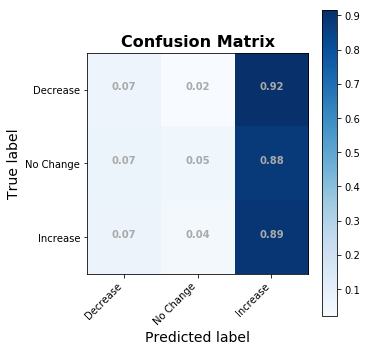

1246/1246 [==============================] - 0s 238us/step
Mean Class Accuracy = 0.422057660293345
Class Accuracy Values:
[0.18561485 0.09779951 0.98275862]


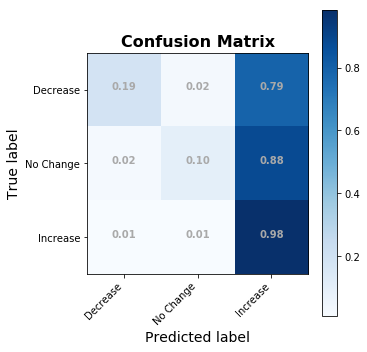




------------------------------------------------------------
09/30/2019-21:20:02
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.0, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.8762 - acc: 0.3266
Epoch 2/10
1246/1246 [==============================] - 1s 711us/step - loss: 1.6244 - acc: 0.3563
Epoch 3/10
1246/1246 [==============================] - 1s 755us/step - loss: 1.4634 - acc: 0.3531
Epoch 4/10
1246/1246 [==============================] - 1s 750us/step - loss: 1.3530 - acc: 0.3852
Epoch 5/10
1246/1246 [==============================] - 1s 665us/step - loss: 1.2803 - acc: 0.3692 0s - loss: 1.2919 - acc: 0
Epoch 6/10
1246/1246 [==============================] - 1s 705us/step - loss: 1.2282 - ac

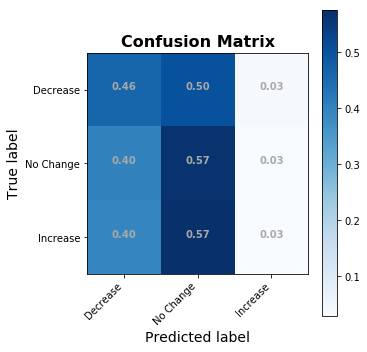

1246/1246 [==============================] - 0s 246us/step
Mean Class Accuracy = 0.41716693128675186
Class Accuracy Values:
[0.51781473 0.67654321 0.05714286]


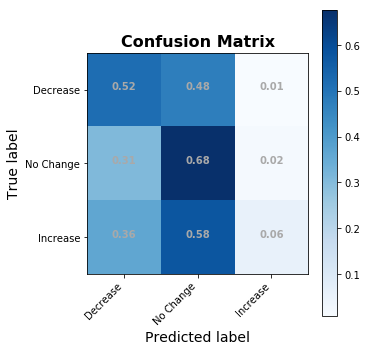




------------------------------------------------------------
09/30/2019-21:20:13
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.0, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.9061 - acc: 0.3250
Epoch 2/10
1246/1246 [==============================] - 1s 690us/step - loss: 1.6618 - acc: 0.3732
Epoch 3/10
1246/1246 [==============================] - 1s 658us/step - loss: 1.5075 - acc: 0.3844
Epoch 4/10
1246/1246 [==============================] - 1s 724us/step - loss: 1.3970 - acc: 0.3973
Epoch 5/10
1246/1246 [==============================] - 1s 661us/step - loss: 1.3211 - acc: 0.4318
Epoch 6/10
1246/1246 [==============================] - 1s 653us/step - loss: 1.2524 - acc: 0.4647
Epoch 7/10
1246/1

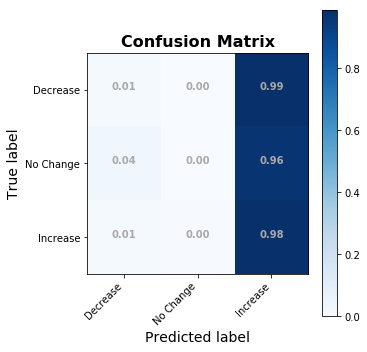

1246/1246 [==============================] - 0s 244us/step
Mean Class Accuracy = 0.39078734114492736
Class Accuracy Values:
[0.14634146 0.02843602 0.99758454]


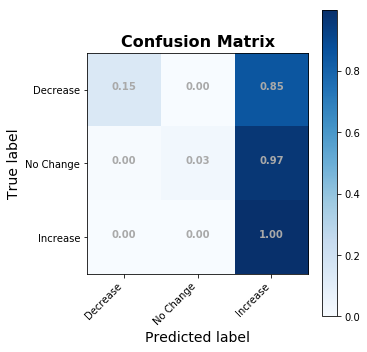




------------------------------------------------------------
09/30/2019-21:20:24
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.0, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 3, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.7596 - acc: 0.3507
Epoch 2/10
1246/1246 [==============================] - 1s 628us/step - loss: 1.5711 - acc: 0.3395
Epoch 3/10
1246/1246 [==============================] - 1s 628us/step - loss: 1.4436 - acc: 0.3571
Epoch 4/10
1246/1246 [==============================] - 1s 637us/step - loss: 1.3537 - acc: 0.3692
Epoch 5/10
1246/1246 [==============================] - 1s 619us/step - loss: 1.2885 - acc: 0.3836
Epoch 6/10
1246/1246 [==============================] - 1s 693us/step - loss: 1.2395 - acc: 0.3900
Epoch 7/10
1246/1

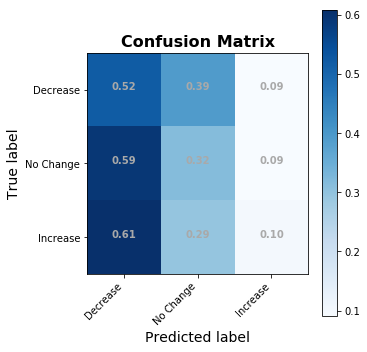

1246/1246 [==============================] - 0s 240us/step
Mean Class Accuracy = 0.6038176056762384
Class Accuracy Values:
[0.86542923 0.63814181 0.30788177]


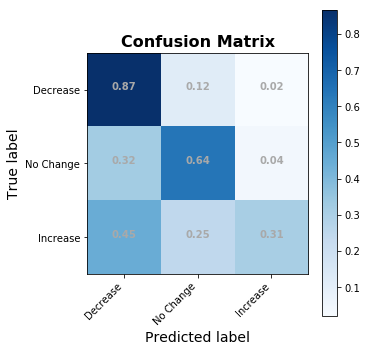




------------------------------------------------------------
09/30/2019-21:20:34
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.0, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 3, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.7535 - acc: 0.3467
Epoch 2/10
1246/1246 [==============================] - 1s 621us/step - loss: 1.5460 - acc: 0.3579
Epoch 3/10
1246/1246 [==============================] - 1s 628us/step - loss: 1.4156 - acc: 0.3868
Epoch 4/10
1246/1246 [==============================] - 1s 737us/step - loss: 1.3277 - acc: 0.3957
Epoch 5/10
1246/1246 [==============================] - 1s 714us/step - loss: 1.2670 - acc: 0.3989
Epoch 6/10
1246/1246 [==============================] - 1s 895us/step - loss: 1.2145 - acc: 0.4254
Epoch 7/10
1246/1

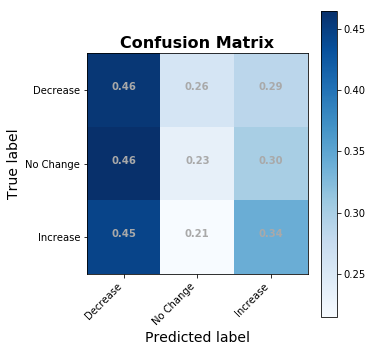

1246/1246 [==============================] - 0s 245us/step
Mean Class Accuracy = 0.6465447180015668
Class Accuracy Values:
[0.79809976 0.4962963  0.6452381 ]


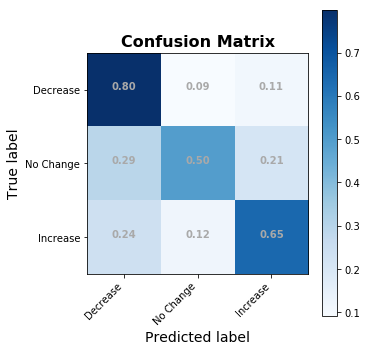




------------------------------------------------------------
09/30/2019-21:20:45
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.0, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 3, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.7332 - acc: 0.3258
Epoch 2/10
1246/1246 [==============================] - 1s 635us/step - loss: 1.5191 - acc: 0.3387
Epoch 3/10
1246/1246 [==============================] - 1s 632us/step - loss: 1.3834 - acc: 0.3780
Epoch 4/10
1246/1246 [==============================] - 1s 637us/step - loss: 1.2972 - acc: 0.4005
Epoch 5/10
1246/1246 [==============================] - 1s 620us/step - loss: 1.2355 - acc: 0.3900
Epoch 6/10
1246/1246 [==============================] - 1s 649us/step - loss: 1.1933 - acc: 0.4109
Epoch 7/10
1246/1

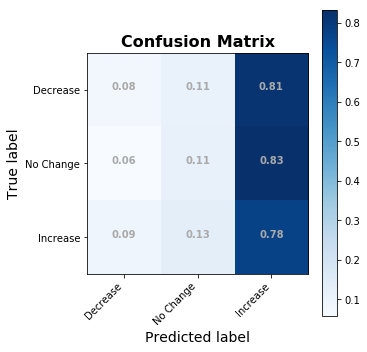

1246/1246 [==============================] - 0s 262us/step
Mean Class Accuracy = 0.4921436576821981
Class Accuracy Values:
[0.21463415 0.32701422 0.93478261]


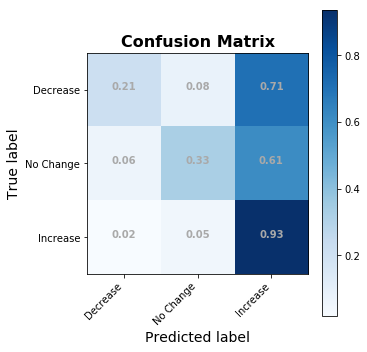




------------------------------------------------------------
09/30/2019-21:20:55
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.0, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 4, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.6529 - acc: 0.3395
Epoch 2/10
1246/1246 [==============================] - 1s 708us/step - loss: 1.4740 - acc: 0.3716
Epoch 3/10
1246/1246 [==============================] - 1s 770us/step - loss: 1.3568 - acc: 0.3628
Epoch 4/10
1246/1246 [==============================] - 1s 733us/step - loss: 1.2770 - acc: 0.3941
Epoch 5/10
1246/1246 [==============================] - 1s 701us/step - loss: 1.2207 - acc: 0.4157
Epoch 6/10
1246/1246 [==============================] - 1s 723us/step - loss: 1.1770 - acc: 0.4382
Epoch 7/10
1246/1

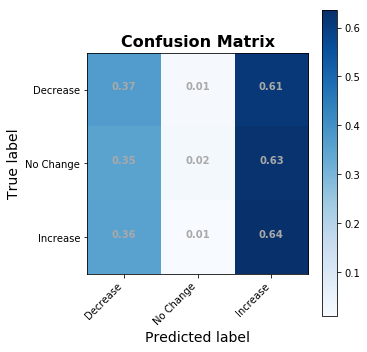

1246/1246 [==============================] - 0s 270us/step
Mean Class Accuracy = 0.5880370767302553
Class Accuracy Values:
[0.68677494 0.200489   0.87684729]


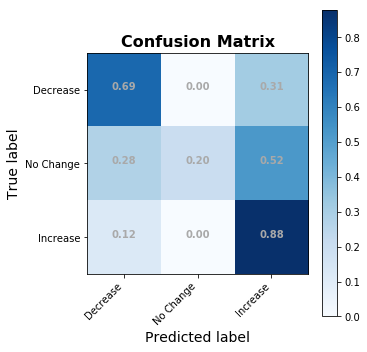




------------------------------------------------------------
09/30/2019-21:21:07
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.0, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 4, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.6520 - acc: 0.3307
Epoch 2/10
1246/1246 [==============================] - 1s 652us/step - loss: 1.4780 - acc: 0.3274
Epoch 3/10
1246/1246 [==============================] - 1s 650us/step - loss: 1.3665 - acc: 0.3427
Epoch 4/10
1246/1246 [==============================] - 1s 674us/step - loss: 1.2879 - acc: 0.3700
Epoch 5/10
1246/1246 [==============================] - 1s 641us/step - loss: 1.2331 - acc: 0.3708
Epoch 6/10
1246/1246 [==============================] - 1s 664us/step - loss: 1.1888 - acc: 0.4053
Epoch 7/10
1246/1

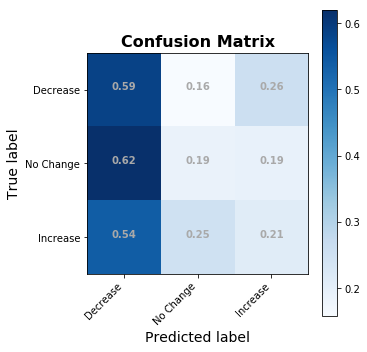

1246/1246 [==============================] - 0s 255us/step
Mean Class Accuracy = 0.6326463684209792
Class Accuracy Values:
[0.90261283 0.4691358  0.52619048]


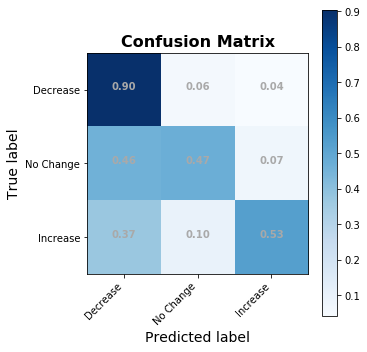




------------------------------------------------------------
09/30/2019-21:21:17
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.0, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 4, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.6685 - acc: 0.3291
Epoch 2/10
1246/1246 [==============================] - 1s 667us/step - loss: 1.4778 - acc: 0.3756
Epoch 3/10
1246/1246 [==============================] - 1s 659us/step - loss: 1.3613 - acc: 0.3981
Epoch 4/10
1246/1246 [==============================] - 1s 675us/step - loss: 1.2785 - acc: 0.4446
Epoch 5/10
1246/1246 [==============================] - 1s 669us/step - loss: 1.2149 - acc: 0.4711
Epoch 6/10
1246/1246 [==============================] - 1s 664us/step - loss: 1.1561 - acc: 0.5088
Epoch 7/10
1246/1

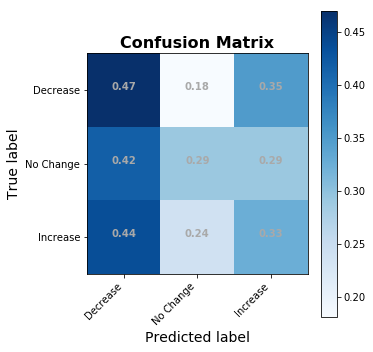

1246/1246 [==============================] - 0s 266us/step
Mean Class Accuracy = 0.8149762549208704
Class Accuracy Values:
[0.88780488 0.79383886 0.76328502]


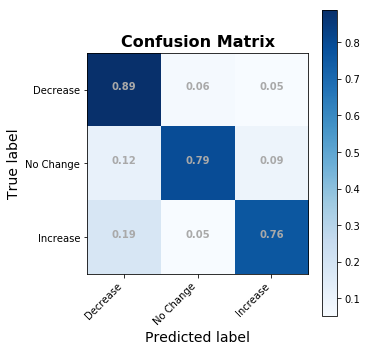




------------------------------------------------------------
09/30/2019-21:21:28
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.9350 - acc: 0.3355
Epoch 2/10
1246/1246 [==============================] - 1s 992us/step - loss: 1.7293 - acc: 0.3555
Epoch 3/10
1246/1246 [==============================] - 1s 987us/step - loss: 1.5970 - acc: 0.3555
Epoch 4/10
1246/1246 [==============================] - 1s 985us/step - loss: 1.4874 - acc: 0.3868
Epoch 5/10
1246/1246 [==============================] - 1s 981us/step - loss: 1.4012 - acc: 0.3708
E

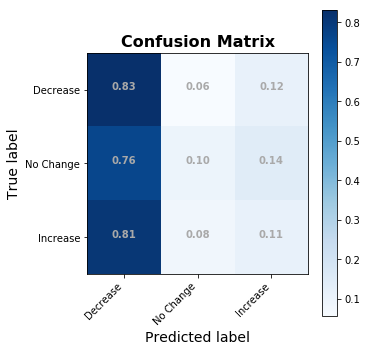

1246/1246 [==============================] - 0s 251us/step
Mean Class Accuracy = 0.43231095232292005
Class Accuracy Values:
[0.92343387 0.1198044  0.25369458]


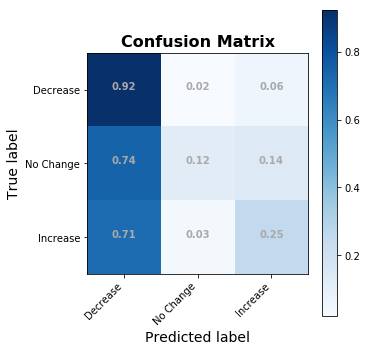




------------------------------------------------------------
09/30/2019-21:21:44
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 3s 2ms/step - loss: 1.9403 - acc: 0.3194
Epoch 2/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.7365 - acc: 0.3323
Epoch 3/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.5980 - acc: 0.3234
Epoch 4/10
1246/1246 [==============================] - 1s 970us/step - loss: 1.4919 - acc: 0.3403
Epoch 5/10
1246/1246 [==============================] - 1s 987us/step - loss: 1.4055 - acc: 0.3571
Epoch 6/10
1246/1246 [==============================] - 1s 980us/step - loss: 1.3358 - acc: 0.3748
Epoch 7/10
1246/1246 

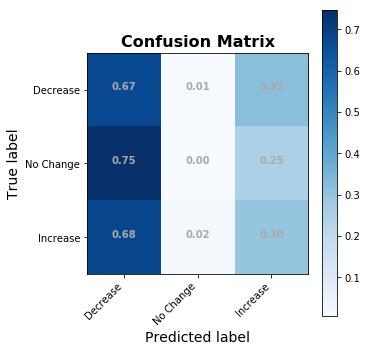

1246/1246 [==============================] - 0s 288us/step
Mean Class Accuracy = 0.4154095467106816
Class Accuracy Values:
[0.8432304  0.01728395 0.38571429]


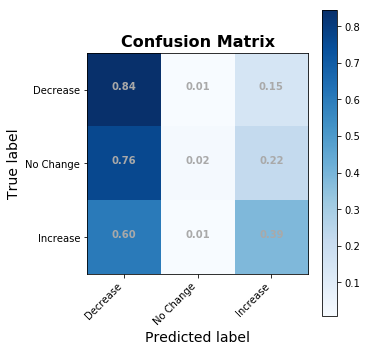




------------------------------------------------------------
09/30/2019-21:22:00
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.9334 - acc: 0.3467
Epoch 2/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.7328 - acc: 0.3716
Epoch 3/10
1246/1246 [==============================] - 1s 986us/step - loss: 1.5976 - acc: 0.3756
Epoch 4/10
1246/1246 [==============================] - 1s 975us/step - loss: 1.4975 - acc: 0.3467
Epoch 5/10
1246/1246 [==============================] - 1s 989us/step - loss: 1.4148 - acc: 0.3612
Epoch 6/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.3509 - acc: 0.3579
Epoch 7/10
1246/1246 

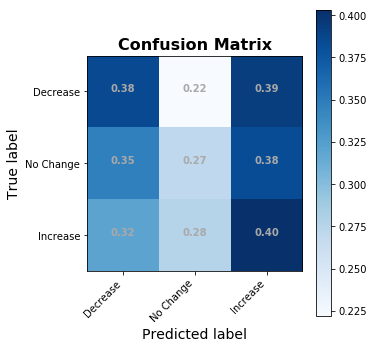

1246/1246 [==============================] - 0s 260us/step
Mean Class Accuracy = 0.4735576630441763
Class Accuracy Values:
[0.5195122  0.36492891 0.53623188]


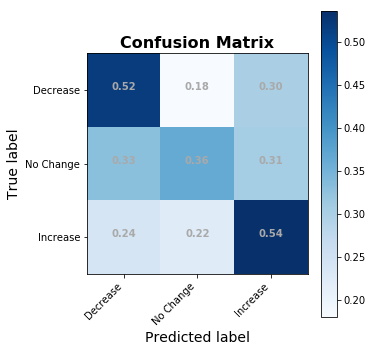




------------------------------------------------------------
09/30/2019-21:22:15
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 3, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.7797 - acc: 0.3082
Epoch 2/10
1246/1246 [==============================] - 1s 990us/step - loss: 1.6033 - acc: 0.3587
Epoch 3/10
1246/1246 [==============================] - 1s 980us/step - loss: 1.4933 - acc: 0.3692
Epoch 4/10
1246/1246 [==============================] - 1s 979us/step - loss: 1.4081 - acc: 0.3660
Epoch 5/10
1246/1246 [==============================] - 1s 986us/step - loss: 1.3440 - acc: 0.3387
Epoch 6/10
1246/1246 [==============================] - 1s 969us/step - loss: 1.2863 - acc: 0.3676
Epoch 7/10
1246/1

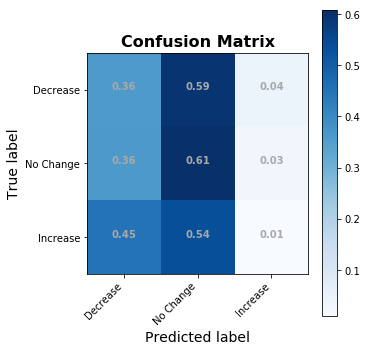

1246/1246 [==============================] - 0s 279us/step
Mean Class Accuracy = 0.4745427392952643
Class Accuracy Values:
[0.54756381 0.77261614 0.10344828]


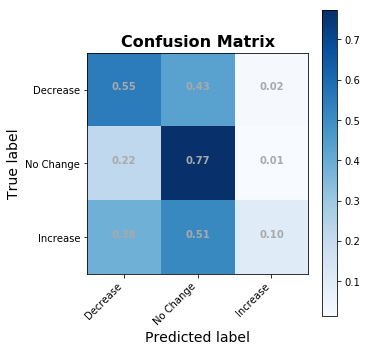




------------------------------------------------------------
09/30/2019-21:22:31
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 3, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.7750 - acc: 0.3082
Epoch 2/10
1246/1246 [==============================] - 1s 979us/step - loss: 1.6036 - acc: 0.3451
Epoch 3/10
1246/1246 [==============================] - 1s 990us/step - loss: 1.4880 - acc: 0.3315
Epoch 4/10
1246/1246 [==============================] - 1s 985us/step - loss: 1.3995 - acc: 0.3499
Epoch 5/10
1246/1246 [==============================] - 1s 986us/step - loss: 1.3328 - acc: 0.3652
Epoch 6/10
1246/1246 [==============================] - 1s 998us/step - loss: 1.2792 - acc: 0.3644
Epoch 7/10
1246/1

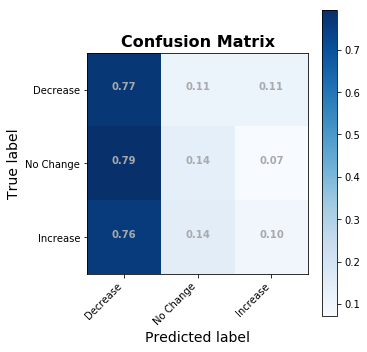

1246/1246 [==============================] - 0s 262us/step
Mean Class Accuracy = 0.44479194158529073
Class Accuracy Values:
[0.89548694 0.22222222 0.21666667]


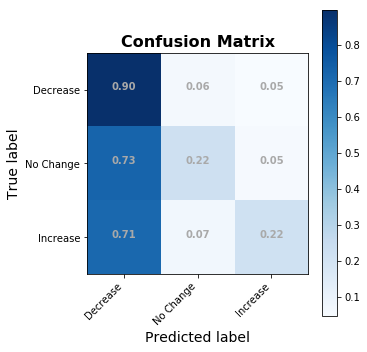




------------------------------------------------------------
09/30/2019-21:22:46
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 3, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 3s 2ms/step - loss: 1.8071 - acc: 0.3130
Epoch 2/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.6370 - acc: 0.3467
Epoch 3/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.5369 - acc: 0.3563
Epoch 4/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.4604 - acc: 0.3660
Epoch 5/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.3996 - acc: 0.3467
Epoch 6/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.3406 - acc: 0.3692
Epoch 7/10
1246/1246 [=====

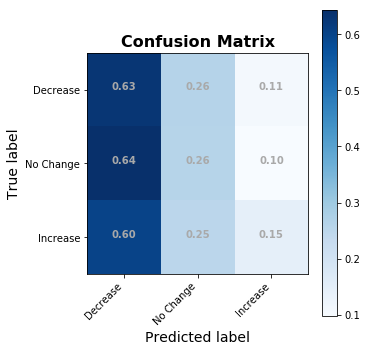

1246/1246 [==============================] - 0s 299us/step
Mean Class Accuracy = 0.46376891634841205
Class Accuracy Values:
[0.71707317 0.48341232 0.19082126]


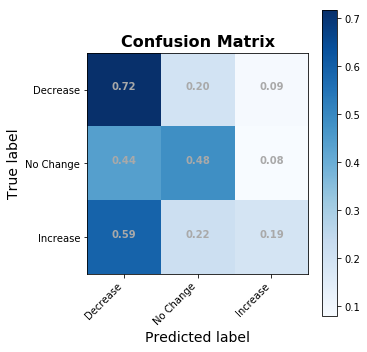




------------------------------------------------------------
09/30/2019-21:23:03
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 4, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 3s 2ms/step - loss: 1.7049 - acc: 0.3266
Epoch 2/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.5619 - acc: 0.3154
Epoch 3/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.4610 - acc: 0.3628
Epoch 4/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.3910 - acc: 0.3387
Epoch 5/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.3285 - acc: 0.3507
Epoch 6/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.2810 - acc: 0.3507
Epoch 7/10
1246/1246 [=====

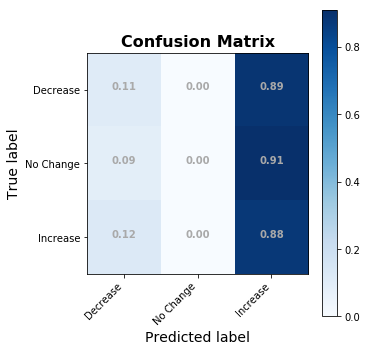

1246/1246 [==============================] - 0s 328us/step
Mean Class Accuracy = 0.41768644087871193
Class Accuracy Values:
[0.2900232  0.00244499 0.96059113]


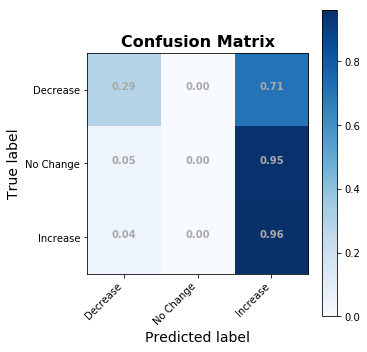




------------------------------------------------------------
09/30/2019-21:23:19
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 4, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 3s 2ms/step - loss: 1.7060 - acc: 0.3363
Epoch 2/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5607 - acc: 0.3218
Epoch 3/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.4743 - acc: 0.3387
Epoch 4/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.3987 - acc: 0.3579
Epoch 5/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.3584 - acc: 0.3283
Epoch 6/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.3058 - acc: 0.3740
Epoch 7/10
1246/1246 [=====

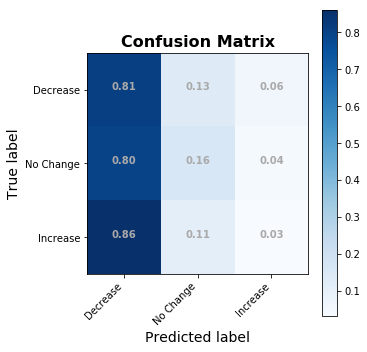

1246/1246 [==============================] - 0s 303us/step
Mean Class Accuracy = 0.4290557042734398
Class Accuracy Values:
[0.94536817 0.23703704 0.1047619 ]


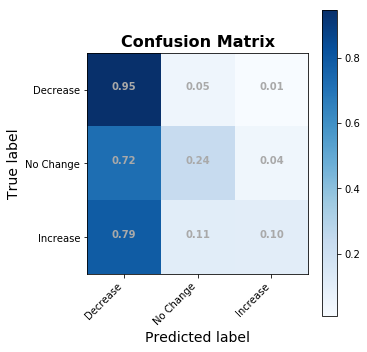




------------------------------------------------------------
09/30/2019-21:23:37
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 4, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 3s 2ms/step - loss: 1.7068 - acc: 0.3355
Epoch 2/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.5599 - acc: 0.3467
Epoch 3/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.4683 - acc: 0.3579
Epoch 4/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.3987 - acc: 0.3547
Epoch 5/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.3348 - acc: 0.3941
Epoch 6/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.2949 - acc: 0.3604
Epoch 7/10
1246/1246 [=====

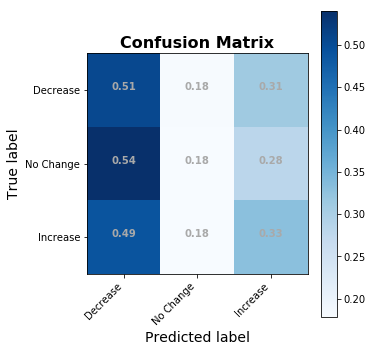

1246/1246 [==============================] - 0s 292us/step
Mean Class Accuracy = 0.55521741177986
Class Accuracy Values:
[0.72439024 0.41469194 0.52657005]


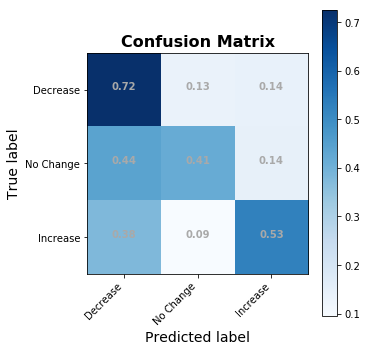




------------------------------------------------------------
09/30/2019-21:23:54
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.4, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 3s 2ms/step - loss: 2.0288 - acc: 0.3507
Epoch 2/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.8737 - acc: 0.3612
Epoch 3/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.7957 - acc: 0.3331
Epoch 4/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.7096 - acc: 0.3427
Epoch 5/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.6369 - acc: 0.3764
Epoch 6/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.5820 - acc: 0.3660A: 1s - loss: 1.6
Epoch 7/10

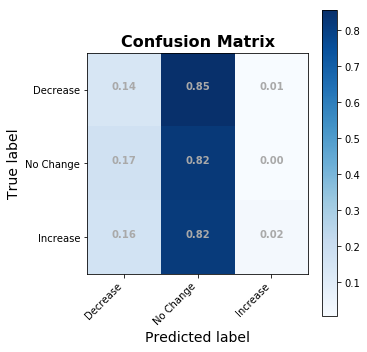

1246/1246 [==============================] - 0s 307us/step
Mean Class Accuracy = 0.39424371320761664
Class Accuracy Values:
[0.28770302 0.87286064 0.02216749]


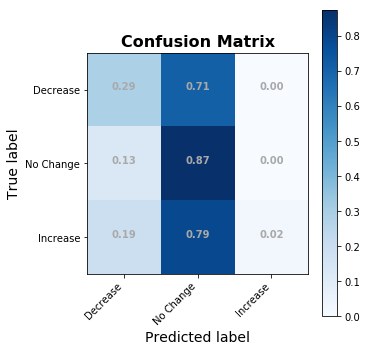




------------------------------------------------------------
09/30/2019-21:24:11
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.4, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 3s 2ms/step - loss: 2.0094 - acc: 0.3242
Epoch 2/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.8608 - acc: 0.3114
Epoch 3/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.7543 - acc: 0.3146
Epoch 4/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.6703 - acc: 0.3242
Epoch 5/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.5930 - acc: 0.3379
Epoch 6/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.5259 - acc: 0.3371
Epoch 7/10
1246/1246 [=====

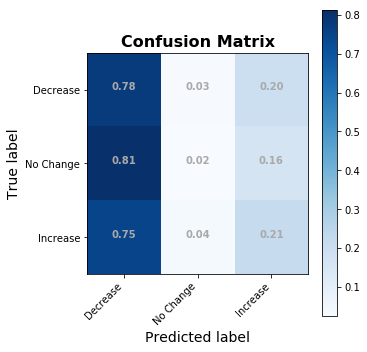

1246/1246 [==============================] - 0s 293us/step
Mean Class Accuracy = 0.38699563341949195
Class Accuracy Values:
[0.86698337 0.03209877 0.26190476]


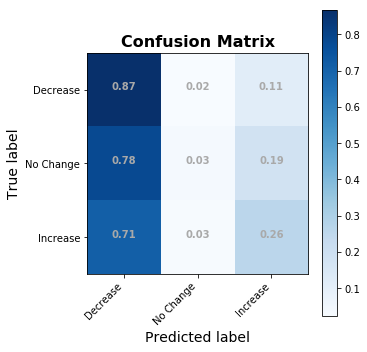




------------------------------------------------------------
09/30/2019-21:24:28
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.4, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 3s 2ms/step - loss: 2.0142 - acc: 0.3443
Epoch 2/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.8607 - acc: 0.3291
Epoch 3/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.7604 - acc: 0.3283
Epoch 4/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.6785 - acc: 0.3475
Epoch 5/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.6028 - acc: 0.3435
Epoch 6/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.5360 - acc: 0.3451
Epoch 7/10
1246/1246 [=====

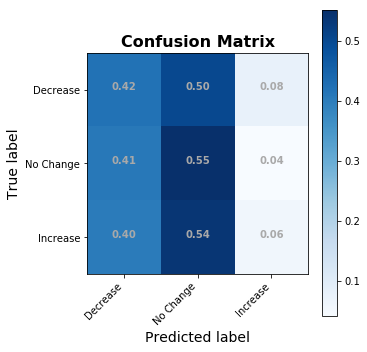

1246/1246 [==============================] - 0s 333us/step
Mean Class Accuracy = 0.4227569309143191
Class Accuracy Values:
[0.52195122 0.62796209 0.11835749]


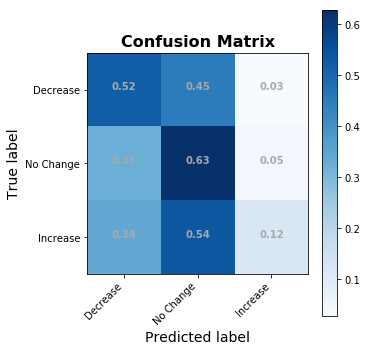




------------------------------------------------------------
09/30/2019-21:24:45
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.4, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 3, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.8496 - acc: 0.3307
Epoch 2/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.7249 - acc: 0.3411
Epoch 3/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.6404 - acc: 0.3604A: 0s - loss: 1.6437 - acc: 0.35
Epoch 4/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.5825 - acc: 0.3459
Epoch 5/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.5220 - acc: 0.3210
Epoch 6/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.4602 - acc: 0.

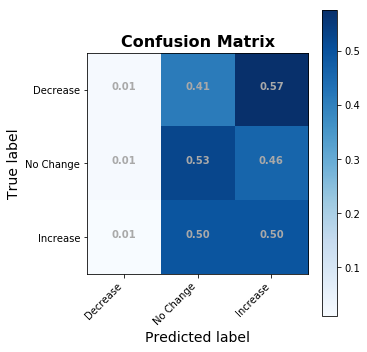

1246/1246 [==============================] - 0s 323us/step
Mean Class Accuracy = 0.3975163140539892
Class Accuracy Values:
[0.04640371 0.55501222 0.591133  ]


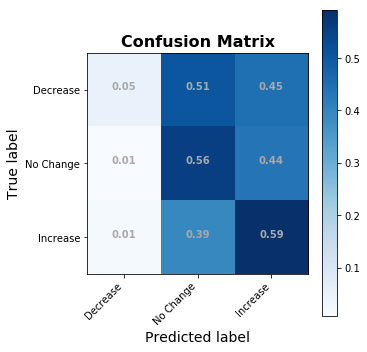




------------------------------------------------------------
09/30/2019-21:25:02
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.4, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 3, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.8371 - acc: 0.3299
Epoch 2/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.6991 - acc: 0.3234
Epoch 3/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.6210 - acc: 0.3291
Epoch 4/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.5451 - acc: 0.3274
Epoch 5/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.4822 - acc: 0.3299
Epoch 6/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.4333 - acc: 0.3539
Epoch 7/10
1246/1246 [=====

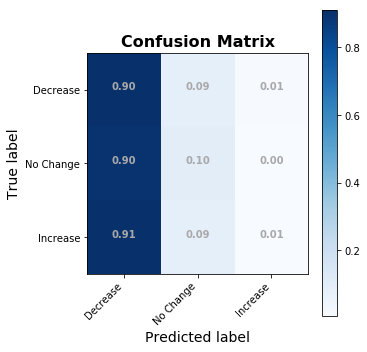

1246/1246 [==============================] - 0s 323us/step
Mean Class Accuracy = 0.34896330368750533
Class Accuracy Values:
[0.93586698 0.10864198 0.00238095]


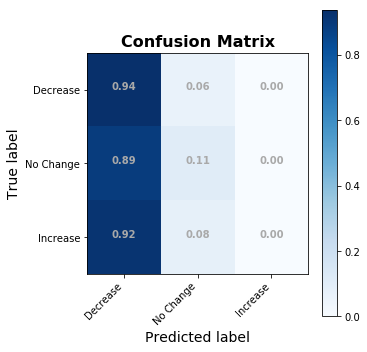




------------------------------------------------------------
09/30/2019-21:25:19
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.4, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 3, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.8985 - acc: 0.3162
Epoch 2/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.7198 - acc: 0.3339
Epoch 3/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.6360 - acc: 0.3291
Epoch 4/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.5668 - acc: 0.3379
Epoch 5/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.5102 - acc: 0.3363
Epoch 6/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.4647 - acc: 0.3451
Epoch 7/10
1246/1246 [=====

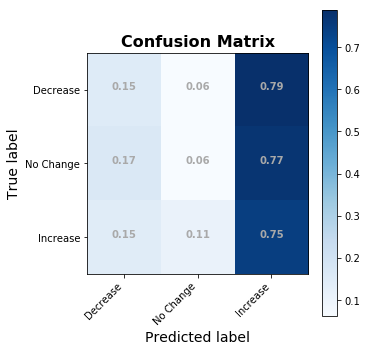

1246/1246 [==============================] - 0s 337us/step
Mean Class Accuracy = 0.38242063738035553
Class Accuracy Values:
[0.20487805 0.10663507 0.83574879]


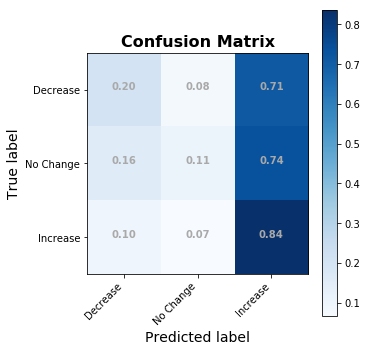




------------------------------------------------------------
09/30/2019-21:25:37
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.4, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 4, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.7669 - acc: 0.3146
Epoch 2/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.6408 - acc: 0.3363
Epoch 3/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.5677 - acc: 0.3419
Epoch 4/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.5012 - acc: 0.3371
Epoch 5/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.4445 - acc: 0.3531
Epoch 6/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.4003 - acc: 0.3443
Epoch 7/10
1246/1246 [=====

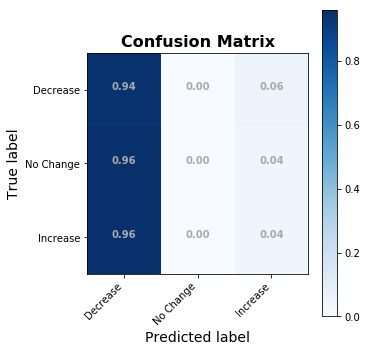

1246/1246 [==============================] - 0s 348us/step
Mean Class Accuracy = 0.35312158305997815
Class Accuracy Values:
[0.95591647 0.         0.10344828]


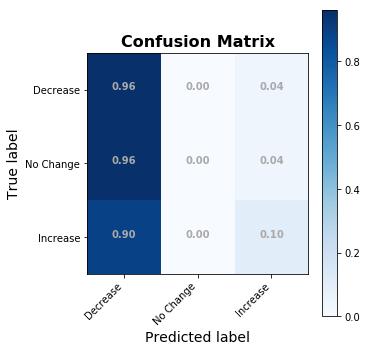




------------------------------------------------------------
09/30/2019-21:25:56
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.4, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 4, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 4s 3ms/step - loss: 1.7897 - acc: 0.3355
Epoch 2/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.6517 - acc: 0.3563
Epoch 3/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5808 - acc: 0.3387
Epoch 4/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5196 - acc: 0.3596
Epoch 5/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.4744 - acc: 0.3652
Epoch 6/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.4266 - acc: 0.3499
Epoch 7/10
1246/1246 [=====

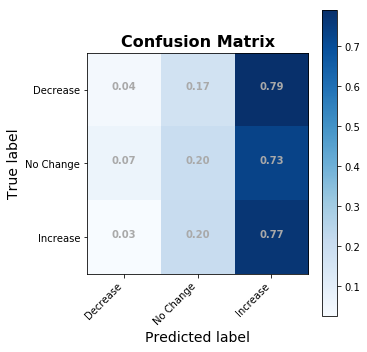

1246/1246 [==============================] - 1s 449us/step
Mean Class Accuracy = 0.4240811957755743
Class Accuracy Values:
[0.10213777 0.2962963  0.87380952]


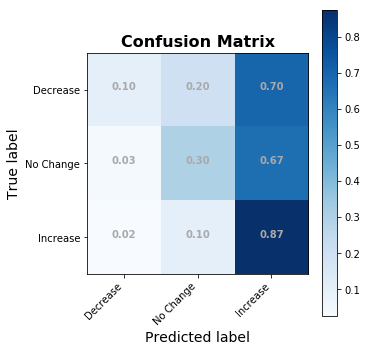




------------------------------------------------------------
09/30/2019-21:26:17
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.4, 'optimizer': 'adadelta', 'activation': 'relu', 'filter_size': 4, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 4s 3ms/step - loss: 1.7838 - acc: 0.3411
Epoch 2/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.6490 - acc: 0.3427
Epoch 3/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5808 - acc: 0.3612
Epoch 4/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5261 - acc: 0.3555
Epoch 5/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.4666 - acc: 0.3708
Epoch 6/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.4217 - acc: 0.3628
Epoch 7/10
1246/1246 [=====

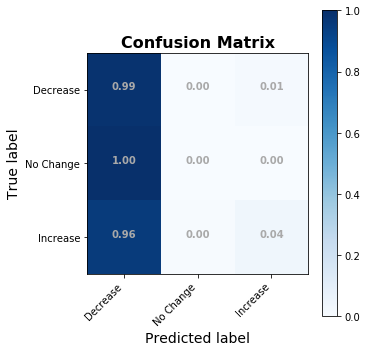

1246/1246 [==============================] - 1s 437us/step
Mean Class Accuracy = 0.3445745011746429
Class Accuracy Values:
[0.99512195 0.00236967 0.03623188]


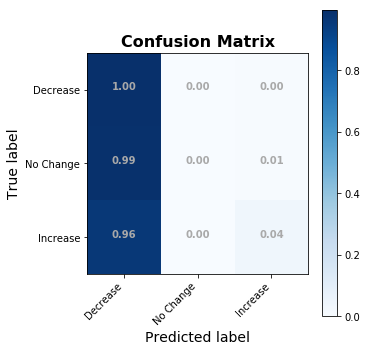




------------------------------------------------------------
09/30/2019-21:26:39
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.0, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 4s 4ms/step - loss: 1.9686 - acc: 0.3403
Epoch 2/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.7468 - acc: 0.3708
Epoch 3/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.6048 - acc: 0.4133
Epoch 4/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5116 - acc: 0.4181
Epoch 5/10
1246/1246 [==============================] - ETA: 0s - loss: 1.4293 - acc: 0.480 - 1s 1ms/step - loss: 1.4283 - acc: 0.4815
Epoch 6/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.3641 -

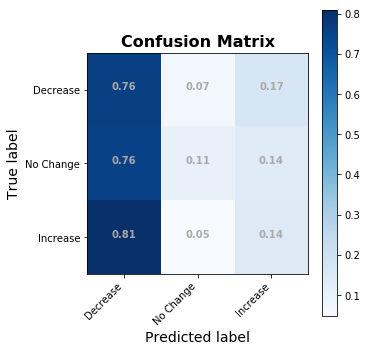

1246/1246 [==============================] - 1s 449us/step
Mean Class Accuracy = 0.543382564795427
Class Accuracy Values:
[0.93735499 0.24205379 0.45073892]


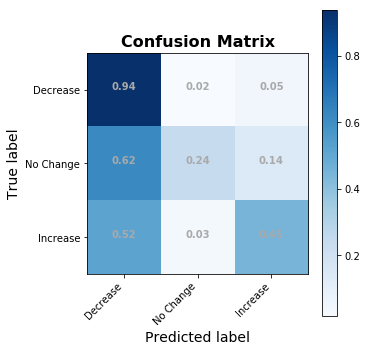




------------------------------------------------------------
09/30/2019-21:26:59
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.0, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 4s 3ms/step - loss: 1.9647 - acc: 0.3395
Epoch 2/10
1246/1246 [==============================] - 1s 998us/step - loss: 1.7723 - acc: 0.3467
Epoch 3/10
1246/1246 [==============================] - 1s 978us/step - loss: 1.6296 - acc: 0.4254
Epoch 4/10
1246/1246 [==============================] - 1s 965us/step - loss: 1.5304 - acc: 0.4526
Epoch 5/10
1246/1246 [==============================] - 1s 966us/step - loss: 1.4568 - acc: 0.4823
Epoch 6/10
1246/1246 [==============================] - 1s 952us/step - loss: 1.3810 - acc: 0.5136
Epoch 7/10
1246

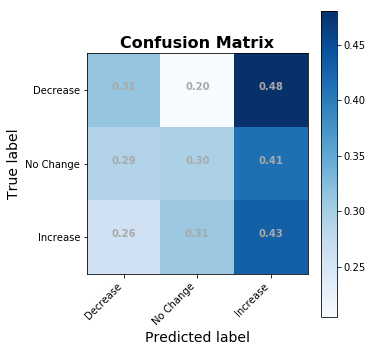

1246/1246 [==============================] - 1s 418us/step
Mean Class Accuracy = 0.6970847803653294
Class Accuracy Values:
[0.71021378 0.53580247 0.8452381 ]


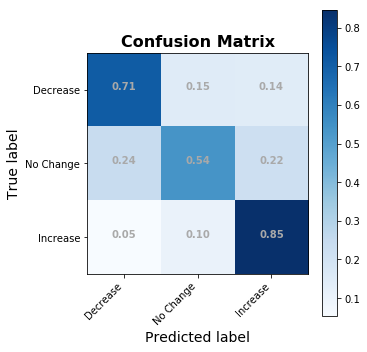




------------------------------------------------------------
09/30/2019-21:27:16
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.0, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 4s 3ms/step - loss: 1.9652 - acc: 0.3676
Epoch 2/10
1246/1246 [==============================] - 1s 961us/step - loss: 1.7904 - acc: 0.3700
Epoch 3/10
1246/1246 [==============================] - 1s 962us/step - loss: 1.6560 - acc: 0.4382
Epoch 4/10
1246/1246 [==============================] - ETA: 0s - loss: 1.5672 - acc: 0.472 - 1s 1ms/step - loss: 1.5665 - acc: 0.4679
Epoch 5/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.4872 - acc: 0.4936
Epoch 6/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.42

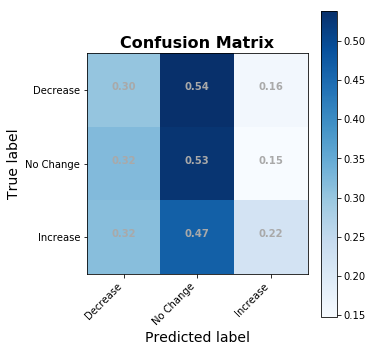

1246/1246 [==============================] - 1s 436us/step
Mean Class Accuracy = 0.7156219967309915
Class Accuracy Values:
[0.6804878  0.86492891 0.60144928]


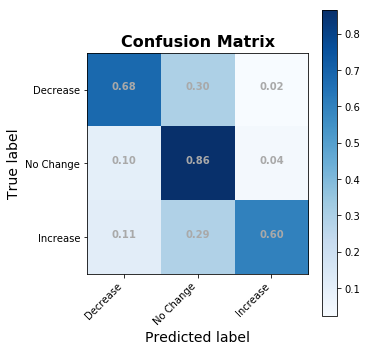




------------------------------------------------------------
09/30/2019-21:27:34
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.0, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 3, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 4s 3ms/step - loss: 1.8024 - acc: 0.3194
Epoch 2/10
1246/1246 [==============================] - 1s 962us/step - loss: 1.6151 - acc: 0.3836 0s - loss: 1.6207 - acc: 0.38
Epoch 3/10
1246/1246 [==============================] - 1s 991us/step - loss: 1.5141 - acc: 0.3780
Epoch 4/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.4240 - acc: 0.4334
Epoch 5/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.3588 - acc: 0.4639
Epoch 6/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.3080 - acc

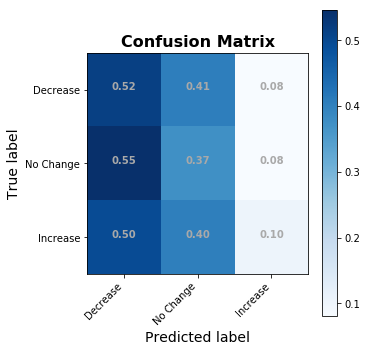

1246/1246 [==============================] - 1s 411us/step
Mean Class Accuracy = 0.6764792015821389
Class Accuracy Values:
[0.90951276 0.77017115 0.34975369]


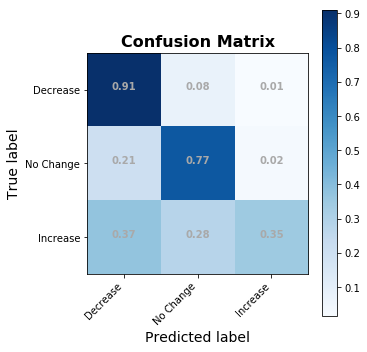




------------------------------------------------------------
09/30/2019-21:27:51
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.0, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 3, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 4s 3ms/step - loss: 1.7911 - acc: 0.3283
Epoch 2/10
1246/1246 [==============================] - 1s 957us/step - loss: 1.6174 - acc: 0.3652
Epoch 3/10
1246/1246 [==============================] - 1s 947us/step - loss: 1.5038 - acc: 0.3973 0s - loss: 1.5261
Epoch 4/10
1246/1246 [==============================] - 1s 950us/step - loss: 1.4222 - acc: 0.4270
Epoch 5/10
1246/1246 [==============================] - 1s 964us/step - loss: 1.3590 - acc: 0.4510
Epoch 6/10
1246/1246 [==============================] - 1s 976us/step - loss: 1.3037 - acc: 0.46

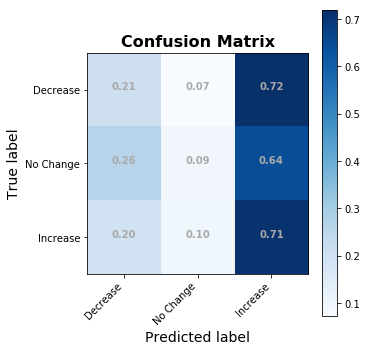

1246/1246 [==============================] - 1s 429us/step
Mean Class Accuracy = 0.5426338565689318
Class Accuracy Values:
[0.50356295 0.21481481 0.90952381]


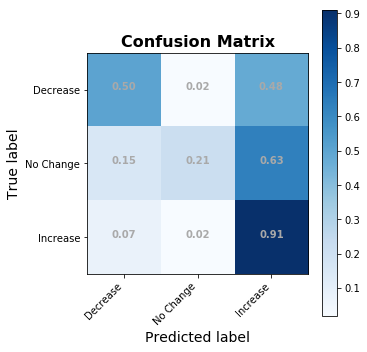




------------------------------------------------------------
09/30/2019-21:28:09
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.0, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 3, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 4s 3ms/step - loss: 1.7878 - acc: 0.3283
Epoch 2/10
1246/1246 [==============================] - 1s 981us/step - loss: 1.6084 - acc: 0.3732
Epoch 3/10
1246/1246 [==============================] - 1s 986us/step - loss: 1.4909 - acc: 0.4109
Epoch 4/10
1246/1246 [==============================] - 1s 989us/step - loss: 1.3990 - acc: 0.4526
Epoch 5/10
1246/1246 [==============================] - 1s 979us/step - loss: 1.3342 - acc: 0.4848
Epoch 6/10
1246/1246 [==============================] - 1s 974us/step - loss: 1.2738 - acc: 0.4992
Epoch 7/10
1246

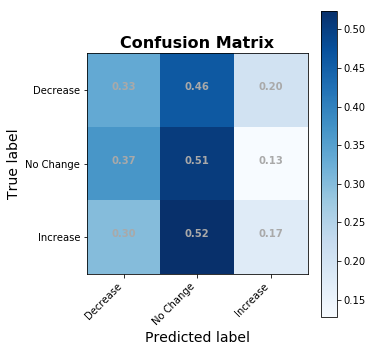

1246/1246 [==============================] - 1s 444us/step
Mean Class Accuracy = 0.7101116082937736
Class Accuracy Values:
[0.7195122  0.86492891 0.54589372]


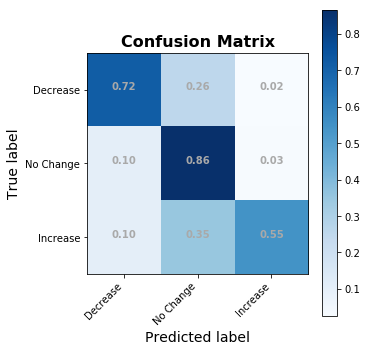




------------------------------------------------------------
09/30/2019-21:28:27
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.0, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 4, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 4s 3ms/step - loss: 1.7062 - acc: 0.3315
Epoch 2/10
1246/1246 [==============================] - 1s 994us/step - loss: 1.5384 - acc: 0.3612
Epoch 3/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.4390 - acc: 0.3628
Epoch 4/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.3691 - acc: 0.3612A: 0s - loss: 1.3745 - acc:
Epoch 5/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.3053 - acc: 0.4294
Epoch 6/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.2588 - acc: 0.4

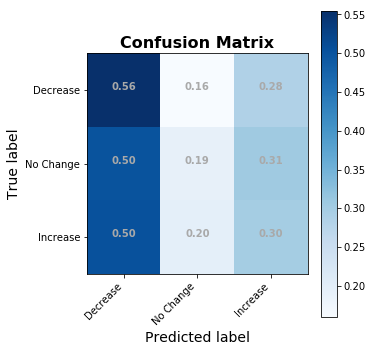

1246/1246 [==============================] - 1s 429us/step
Mean Class Accuracy = 0.6945430241474854
Class Accuracy Values:
[0.77262181 0.57701711 0.73399015]


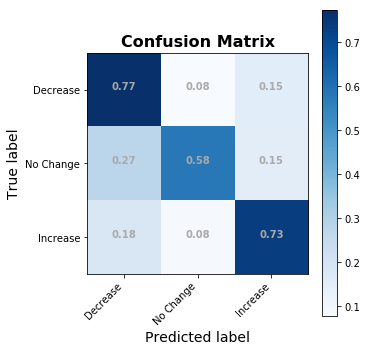




------------------------------------------------------------
09/30/2019-21:28:45
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.0, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 4, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 4s 3ms/step - loss: 1.6868 - acc: 0.3443
Epoch 2/10
1246/1246 [==============================] - 1s 986us/step - loss: 1.5163 - acc: 0.3644
Epoch 3/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.4157 - acc: 0.3660
Epoch 4/10
1246/1246 [==============================] - 1s 994us/step - loss: 1.3413 - acc: 0.4093
Epoch 5/10
1246/1246 [==============================] - 1s 991us/step - loss: 1.2818 - acc: 0.4502
Epoch 6/10
1246/1246 [==============================] - 1s 999us/step - loss: 1.2405 - acc: 0.4615
Epoch 7/10
1246/1

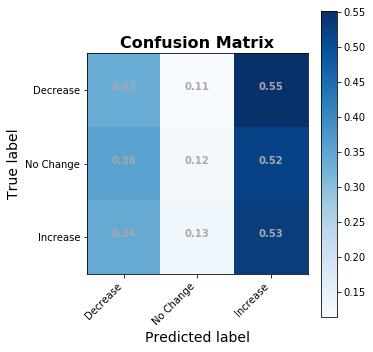

1246/1246 [==============================] - 1s 438us/step
Mean Class Accuracy = 0.6669064306171721
Class Accuracy Values:
[0.7719715  0.40493827 0.82380952]


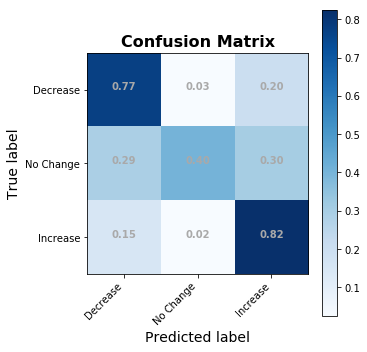




------------------------------------------------------------
09/30/2019-21:29:03
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.0, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 4, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 4s 3ms/step - loss: 1.7296 - acc: 0.3234
Epoch 2/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.5492 - acc: 0.3379
Epoch 3/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.4497 - acc: 0.3884
Epoch 4/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.3836 - acc: 0.3692A: 1s - loss: 1.
Epoch 5/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.3213 - acc: 0.4398
Epoch 6/10
1246/1246 [==============================] - 1s 1ms/step - loss: 1.2669 - acc: 0.4518
Epoch 7/1

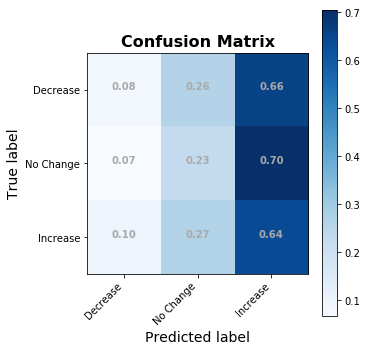

1246/1246 [==============================] - 1s 480us/step
Mean Class Accuracy = 0.6259626329349358
Class Accuracy Values:
[0.33414634 0.61137441 0.93236715]


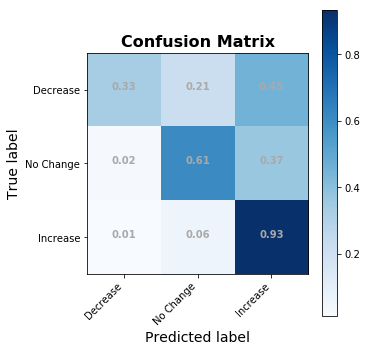




------------------------------------------------------------
09/30/2019-21:29:22
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 5s 4ms/step - loss: 2.0264 - acc: 0.3395
Epoch 2/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.8398 - acc: 0.3515A: 1s - loss: 1.8787
Epoch 3/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.7417 - acc: 0.3491
Epoch 4/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.6444 - acc: 0.3812
Epoch 5/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5774 - acc: 0.3836
Epoch 6/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5043 - acc: 0.3933
Epoch

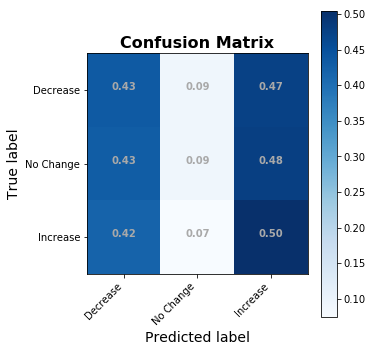

1246/1246 [==============================] - 1s 474us/step
Mean Class Accuracy = 0.5197449164194866
Class Accuracy Values:
[0.61484919 0.19315403 0.75123153]


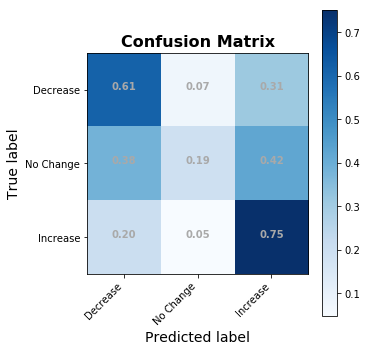




------------------------------------------------------------
09/30/2019-21:29:45
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 5s 4ms/step - loss: 2.0183 - acc: 0.3339
Epoch 2/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.8505 - acc: 0.3443
Epoch 3/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.7539 - acc: 0.3459
Epoch 4/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.6627 - acc: 0.3531
Epoch 5/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5889 - acc: 0.3748
Epoch 6/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5199 - acc: 0.3812
Epoch 7/10
1246/1246 [===

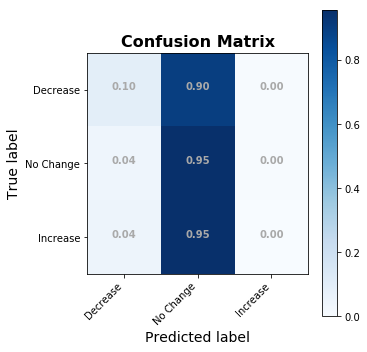

1246/1246 [==============================] - 1s 478us/step
Mean Class Accuracy = 0.40356343411239165
Class Accuracy Values:
[0.21377672 0.98024691 0.01666667]


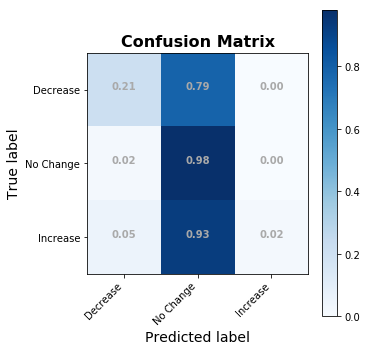




------------------------------------------------------------
09/30/2019-21:30:08
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 5s 4ms/step - loss: 2.0359 - acc: 0.3299
Epoch 2/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.8575 - acc: 0.3732
Epoch 3/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.7552 - acc: 0.3740
Epoch 4/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.6732 - acc: 0.3636
Epoch 5/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5867 - acc: 0.3764
Epoch 6/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5292 - acc: 0.3828
Epoch 7/10
1246/1246 [===

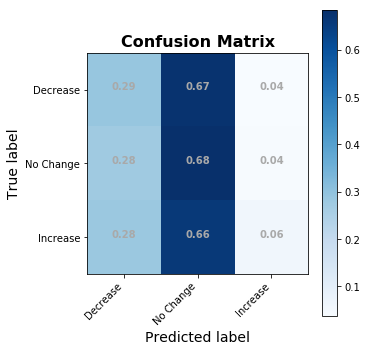

1246/1246 [==============================] - 1s 507us/step
Mean Class Accuracy = 0.4619136488088557
Class Accuracy Values:
[0.37560976 0.8507109  0.15942029]


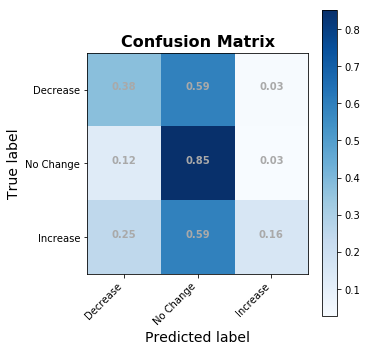




------------------------------------------------------------
09/30/2019-21:30:31
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 3, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 5s 4ms/step - loss: 1.8872 - acc: 0.3146
Epoch 2/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.7140 - acc: 0.3604
Epoch 3/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.6406 - acc: 0.3523
Epoch 4/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5661 - acc: 0.3684
Epoch 5/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5072 - acc: 0.3515
Epoch 6/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.4513 - acc: 0.3796
Epoch 7/10
1246/1246 [===

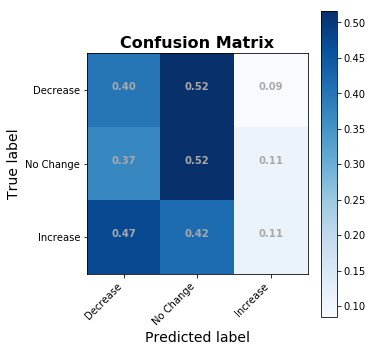

1246/1246 [==============================] - 1s 516us/step
Mean Class Accuracy = 0.5404035582830325
Class Accuracy Values:
[0.66821346 0.69437653 0.25862069]


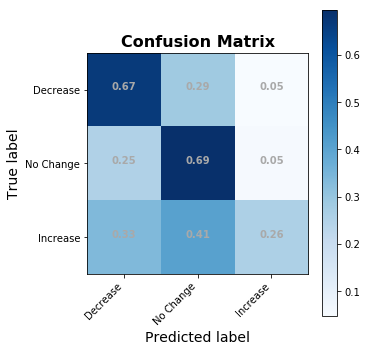




------------------------------------------------------------
09/30/2019-21:30:55
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 3, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 5s 4ms/step - loss: 1.8372 - acc: 0.3379
Epoch 2/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.6718 - acc: 0.3539
Epoch 3/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5816 - acc: 0.3523
Epoch 4/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5048 - acc: 0.3547
Epoch 5/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.4435 - acc: 0.3579
Epoch 6/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.3919 - acc: 0.3668A: 0s - loss: 1.4044 - 
Ep

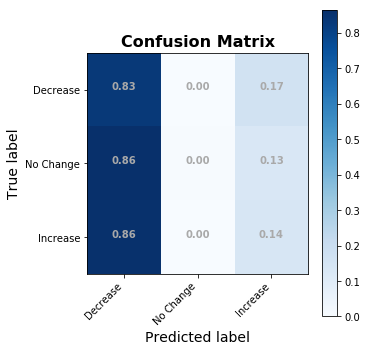

1246/1246 [==============================] - 1s 503us/step
Mean Class Accuracy = 0.4238965901013935
Class Accuracy Values:
[0.96437055 0.00493827 0.30238095]


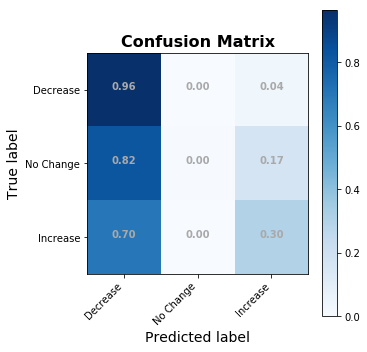




------------------------------------------------------------
09/30/2019-21:31:19
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 3, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 5s 4ms/step - loss: 1.8556 - acc: 0.3555
Epoch 2/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.6996 - acc: 0.3218
Epoch 3/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5940 - acc: 0.3539
Epoch 4/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5346 - acc: 0.3660
Epoch 5/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.4786 - acc: 0.3507A: 0s - loss: 1.4821 - acc: 
Epoch 6/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.4277 - acc: 0.37

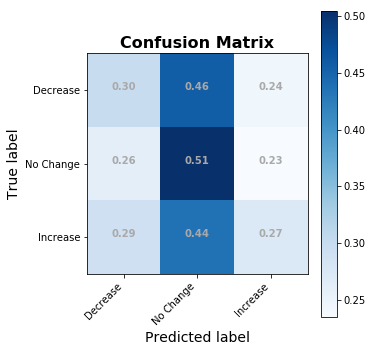

1246/1246 [==============================] - 1s 472us/step
Mean Class Accuracy = 0.5259664860540356
Class Accuracy Values:
[0.45121951 0.6943128  0.43236715]


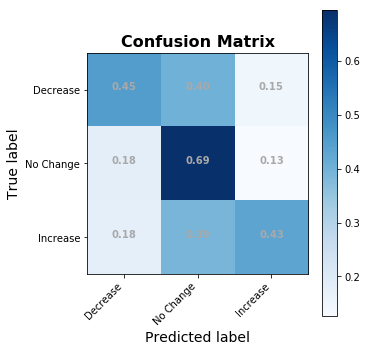




------------------------------------------------------------
09/30/2019-21:31:44
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 4, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 5s 4ms/step - loss: 1.7653 - acc: 0.3122
Epoch 2/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.6193 - acc: 0.3523
Epoch 3/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5530 - acc: 0.3194
Epoch 4/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.4739 - acc: 0.3539
Epoch 5/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.4261 - acc: 0.3700
Epoch 6/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.3762 - acc: 0.3796
Epoch 7/10
1246/1246 [===

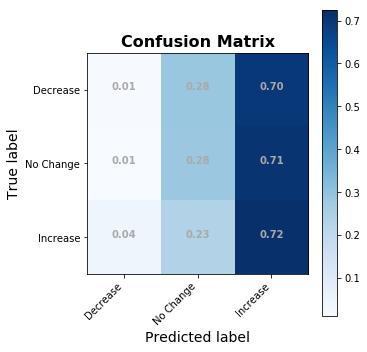

1246/1246 [==============================] - 1s 498us/step
Mean Class Accuracy = 0.45334825295745396
Class Accuracy Values:
[0.09976798 0.44254279 0.81773399]


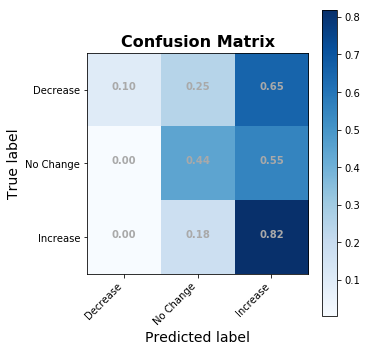




------------------------------------------------------------
09/30/2019-21:32:08
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 4, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 6s 4ms/step - loss: 1.7586 - acc: 0.3154
Epoch 2/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5936 - acc: 0.3491
Epoch 3/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5046 - acc: 0.3563
Epoch 4/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.4406 - acc: 0.3868
Epoch 5/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.3959 - acc: 0.3620
Epoch 6/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.3590 - acc: 0.3949
Epoch 7/10
1246/1246 [===

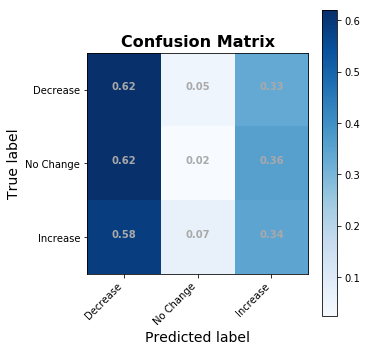

1246/1246 [==============================] - 1s 515us/step
Mean Class Accuracy = 0.5089766952791498
Class Accuracy Values:
[0.80047506 0.14074074 0.58571429]


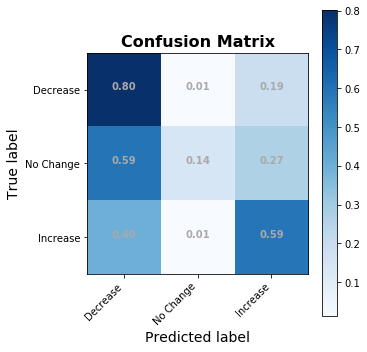




------------------------------------------------------------
09/30/2019-21:32:34
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 4, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 6s 5ms/step - loss: 1.7438 - acc: 0.3323
Epoch 2/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.6021 - acc: 0.3283
Epoch 3/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.5216 - acc: 0.3483
Epoch 4/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.4594 - acc: 0.3612
Epoch 5/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.4054 - acc: 0.3507
Epoch 6/10
1246/1246 [==============================] - 2s 1ms/step - loss: 1.3616 - acc: 0.3684
Epoch 7/10
1246/1246 [===

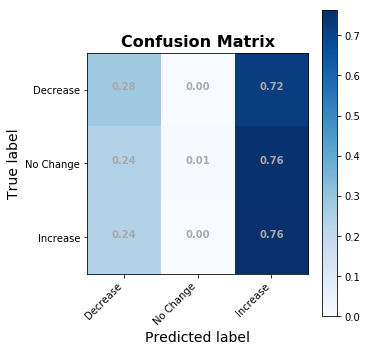

1246/1246 [==============================] - 1s 577us/step
Mean Class Accuracy = 0.4836078261874726
Class Accuracy Values:
[0.5097561  0.04976303 0.89130435]


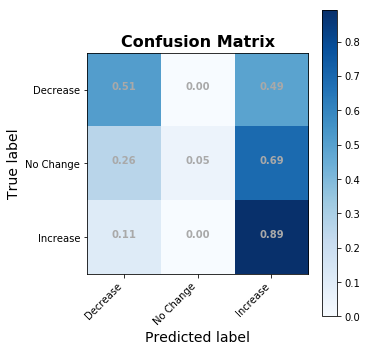




------------------------------------------------------------
09/30/2019-21:33:00
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.4, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 6s 5ms/step - loss: 2.1209 - acc: 0.3515A: 0s - loss: 2.1270 - acc: 0.351
Epoch 2/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.9666 - acc: 0.3331
Epoch 3/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.8613 - acc: 0.3419
Epoch 4/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.8064 - acc: 0.3090
Epoch 5/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.7307 - acc: 0.3435
Epoch 6/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.6614 - acc:

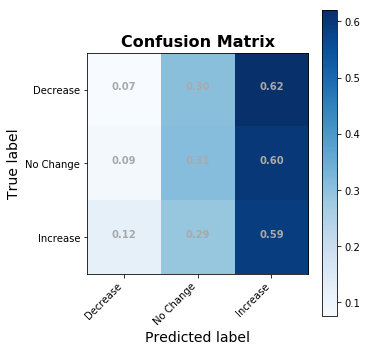

1246/1246 [==============================] - 1s 559us/step
Mean Class Accuracy = 0.42035477403333726
Class Accuracy Values:
[0.15777262 0.35452323 0.74876847]


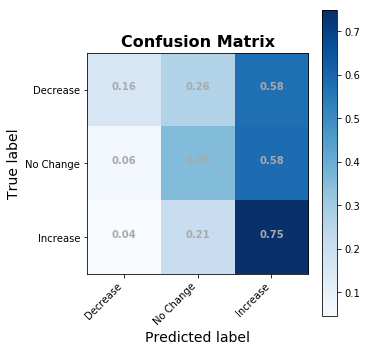




------------------------------------------------------------
09/30/2019-21:33:27
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.4, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 6s 5ms/step - loss: 2.2048 - acc: 0.3170
Epoch 2/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.9512 - acc: 0.3515
Epoch 3/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.9134 - acc: 0.3266
Epoch 4/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.8279 - acc: 0.3499
Epoch 5/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.7654 - acc: 0.3443
Epoch 6/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.6955 - acc: 0.3587
Epoch 7/10
1246/1246 [===

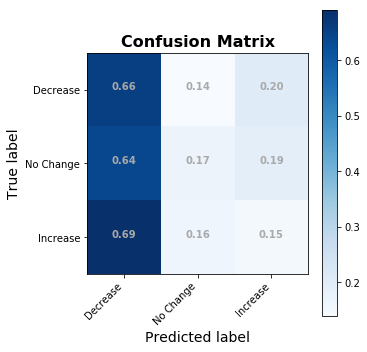

1246/1246 [==============================] - 1s 586us/step
Mean Class Accuracy = 0.42482408699088553
Class Accuracy Values:
[0.79572447 0.20493827 0.27380952]


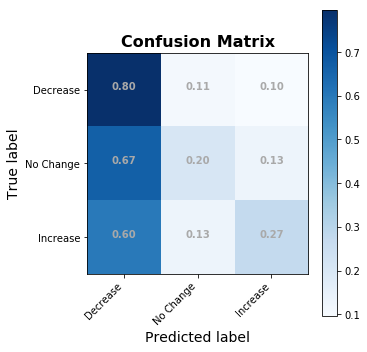




------------------------------------------------------------
09/30/2019-21:33:54
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.4, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 6s 5ms/step - loss: 2.2050 - acc: 0.3435
Epoch 2/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.9733 - acc: 0.3419
Epoch 3/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.8856 - acc: 0.3315
Epoch 4/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.8244 - acc: 0.3507
Epoch 5/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.7833 - acc: 0.3234
Epoch 6/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.7088 - acc: 0.3347
Epoch 7/10
1246/1246 [===

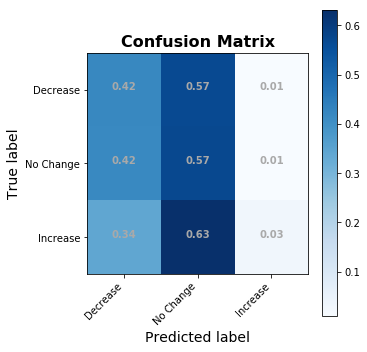

1246/1246 [==============================] - 1s 583us/step
Mean Class Accuracy = 0.4382045507384121
Class Accuracy Values:
[0.53170732 0.73459716 0.04830918]


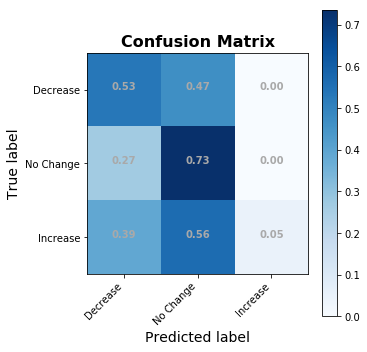




------------------------------------------------------------
09/30/2019-21:34:22
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.4, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 3, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 6s 5ms/step - loss: 2.0016 - acc: 0.3331
Epoch 2/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.8123 - acc: 0.3523
Epoch 3/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.7401 - acc: 0.3395
Epoch 4/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.6907 - acc: 0.3451
Epoch 5/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.6487 - acc: 0.3475
Epoch 6/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.6005 - acc: 0.3499
Epoch 7/10
1246/1246 [===

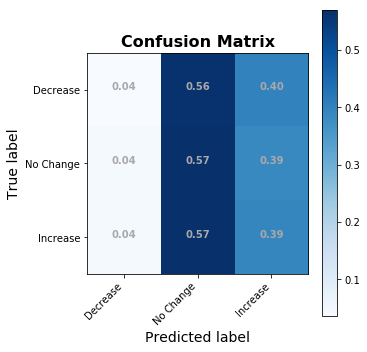

1246/1246 [==============================] - 1s 584us/step
Mean Class Accuracy = 0.4453853246203578
Class Accuracy Values:
[0.09280742 0.73349633 0.50985222]


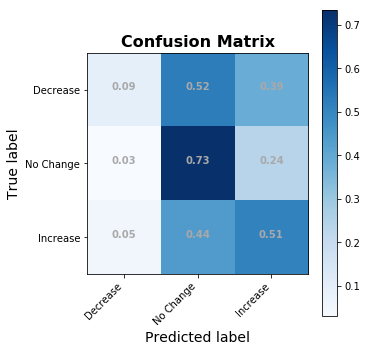




------------------------------------------------------------
09/30/2019-21:34:51
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.4, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 3, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 6s 5ms/step - loss: 1.9213 - acc: 0.3483
Epoch 2/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.7919 - acc: 0.3331
Epoch 3/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.7078 - acc: 0.3491
Epoch 4/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.6604 - acc: 0.3692
Epoch 5/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.6097 - acc: 0.3555
Epoch 6/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.5572 - acc: 0.3628
Epoch 7/10
1246/1246 [===

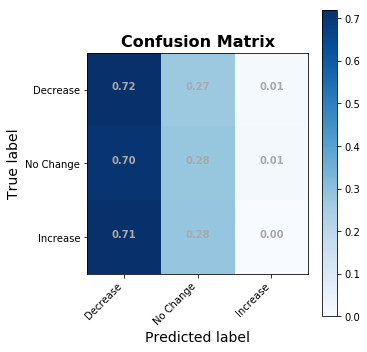

1246/1246 [==============================] - 1s 713us/step
Mean Class Accuracy = 0.3893875476351063
Class Accuracy Values:
[0.77909739 0.36049383 0.02857143]


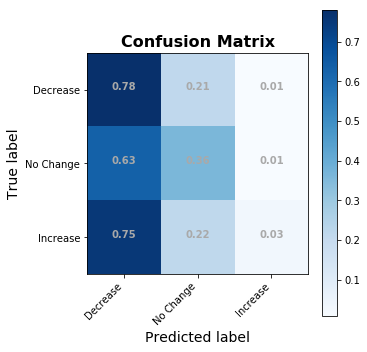




------------------------------------------------------------
09/30/2019-21:35:20
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.4, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 3, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 8s 6ms/step - loss: 1.9655 - acc: 0.3379
Epoch 2/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.7696 - acc: 0.3547
Epoch 3/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.6979 - acc: 0.3563
Epoch 4/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.6438 - acc: 0.3451
Epoch 5/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.5906 - acc: 0.3475
Epoch 6/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.5464 - acc: 0.3475
Epoch 7/10
1246/1246 [===

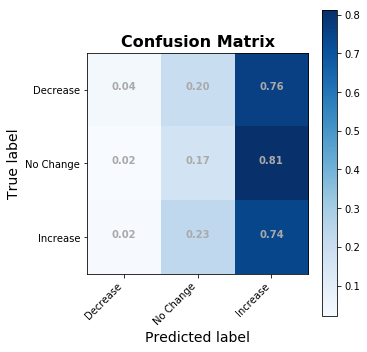

1246/1246 [==============================] - 1s 709us/step
Mean Class Accuracy = 0.4098080122912638
Class Accuracy Values:
[0.08780488 0.29620853 0.84541063]


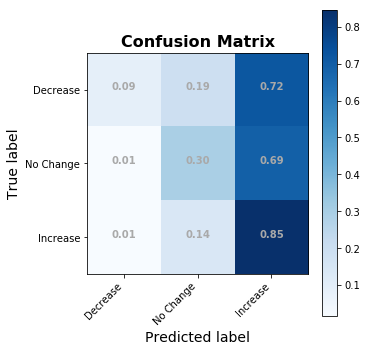




------------------------------------------------------------
09/30/2019-21:35:52
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.4, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 4, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 7s 6ms/step - loss: 1.8619 - acc: 0.3170
Epoch 2/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.6969 - acc: 0.3363
Epoch 3/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.6346 - acc: 0.3315
Epoch 4/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.5787 - acc: 0.3499
Epoch 5/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.5352 - acc: 0.3708
Epoch 6/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.5117 - acc: 0.3563A: 0s - loss: 1.5155 - a
E

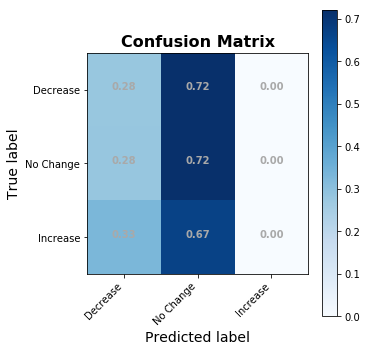

1246/1246 [==============================] - 1s 692us/step
Mean Class Accuracy = 0.41604312860106235
Class Accuracy Values:
[0.47795824 0.77017115 0.        ]


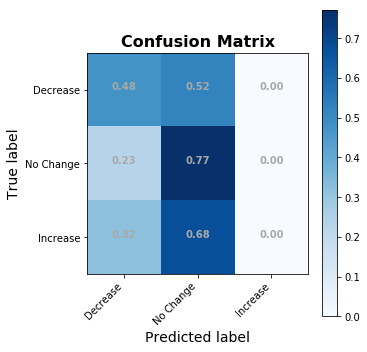




------------------------------------------------------------
09/30/2019-21:36:25
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.4, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 4, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 8s 6ms/step - loss: 1.8974 - acc: 0.3339
Epoch 2/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.7573 - acc: 0.3114
Epoch 3/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.6463 - acc: 0.3604A: 1s - loss: 1
Epoch 4/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.6220 - acc: 0.3315
Epoch 5/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.5744 - acc: 0.3491
Epoch 6/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.5402 - acc: 0.3395
Epoch 7/10

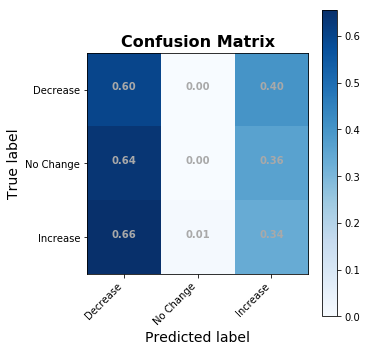

1246/1246 [==============================] - 1s 714us/step
Mean Class Accuracy = 0.4122809553134177
Class Accuracy Values:
[0.74821853 0.01481481 0.47380952]


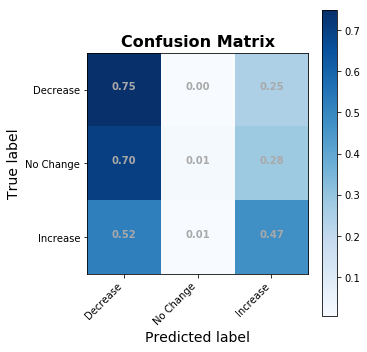




------------------------------------------------------------
09/30/2019-21:36:57
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.4, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 4, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 8s 6ms/step - loss: 1.8716 - acc: 0.3379
Epoch 2/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.6587 - acc: 0.3780
Epoch 3/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.6104 - acc: 0.3499
Epoch 4/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.5587 - acc: 0.3403
Epoch 5/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.5196 - acc: 0.3443
Epoch 6/10
1246/1246 [==============================] - 2s 2ms/step - loss: 1.4750 - acc: 0.3692
Epoch 7/10
1246/1246 [===

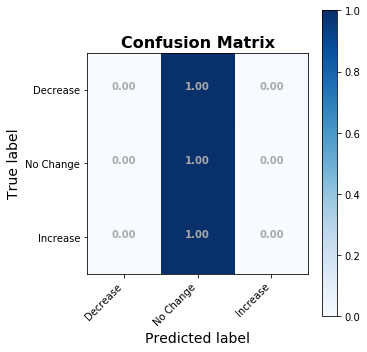

1246/1246 [==============================] - 1s 650us/step
Mean Class Accuracy = 0.34064255135304977
Class Accuracy Values:
[0.0195122  1.         0.00241546]


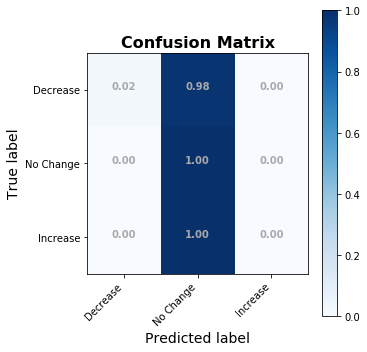




------------------------------------------------------------
09/30/2019-21:37:28
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'linear', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000024FB149D4A8>}
Training model.
Epoch 1/10
1869/1869 [==============================] - 8s 5ms/step - loss: 2.0147 - acc: 0.3312
Epoch 2/10
1869/1869 [==============================] - 3s 2ms/step - loss: 1.8056 - acc: 0.3440
Epoch 3/10
1869/1869 [==============================] - 3s 2ms/step - loss: 1.6763 - acc: 0.3767
Epoch 4/10
1869/1869 [==============================] - 3s 2ms/step - loss: 1.5797 - acc: 0.3472
Epoch 5/10
1869/1869 [==============================] - 3s 2ms/step - loss: 1.4819 - acc: 0.3692
Epoch 6/10
1869/1869 [==============================] - 3s 2ms/step - loss: 1.4103 - acc: 0.3767A: 1s - lo
Epoch 7/10
1869

Lap #,Start Time,Duration,Label
TOTAL,09/30/19 - 09:19:50 PM,"18 min, 17.797 sec",--


{'activation': 'linear', 'dropout': 0.2, 'epochs': 10, 'filter_size': 2, 'n_filters': 100, 'optimizer': 'adadelta'}
(501, b'5.5.2 Cannot Decode response e4sm6100811qkl.135 - gsmtp')
Something went wrong


In [21]:
## Wrapping the model in the `KerasClassifier` wrapper
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

## Wrap create_model with KerasClassifier
# neural_network = KerasClassifier(build_fn=create_model,verbose=2)    

# Create HyperParaemeter Space
params_to_search ={'filter_size':[2,3,4],
                   'activation':['relu','linear'],
                   'n_filters':[100],#,200],#,300,400],
                  'dropout':[0.,0.2,0.4],
                  'optimizer':['adadelta'],
                'epochs':[10]}
grid_result = fit_gridsearch(create_model, params_to_search, X_train,y_train, score_fn=my_custom_scorer)

In [23]:
grid_result[0].best_params_

{'activation': 'linear',
 'dropout': 0.2,
 'epochs': 10,
 'filter_size': 2,
 'n_filters': 100,
 'optimizer': 'adadelta'}

In [ ]:
stop

### Testing Best Params on their Own

In [ ]:
use_params = {'activation': 'linear',
 'dropout': 0.2,
 'epochs': 10,
 'filter_size': 3,
 'n_filters': 100,
'optimizer': 'adadelta'}

In [ ]:
model = create_model(embedding_layer_gl,l2_lr=.005,**use_params)
model.summary()
model_fit, report = fit_and_eval_model(model,X_train, X_test,X_val,
                                      y_train, y_test, y_val,
                                       num_epochs=10,batch_size=100)

## CNN + Dense Layers

In [ ]:
best_params = {'activation': 'relu',
 'activation_dense': 'relu',
 'epochs': 10,
 'filter_size': 3,
 'l2_lr': 0.005,
 'n_filters': 100,
 'optimizer': 'adadelta'}
def create_model_dense(embedding_layer=embedding_layer_gl,trainable=False,
              n_filters=100, filter_size=3,
              activation='relu', activation_dense='relu',optimizer='adadelta',
              dropout=0.2,l2_lr=0.005, batch_size=100,
              epochs=10,verbose = 1,show_summary=False):
    
    ## Print out parameters used to create model for user
    vars = locals()
    dashes = '---'*20
    print('\n\n')
    print(dashes)
    now = pd.datetime.now()
    print(now.strftime('%m/%d/%Y-%T'))
    print(vars)    
    
    
    ## Create network architetcture
    from keras.layers import Input, Conv1D,GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout
    from keras.models import Model
    from keras.regularizers import l2

    print('Training model.')
    MAX_SEQUENCE_LENGTH = X_train.shape[1]
    
    
    embedding_layer.trainable=trainable
    print(f'Embedding layer is trainable={embedding_layer.trainable}')

    
    ## Get Input sequences from embedding_layer
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    ## Specify layer parameters


    ## Conv Layer 1
    x = Conv1D(n_filters, filter_size, activation=activation, data_format='channels_first',
               kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(embedded_sequences)
    
    x = Dropout(dropout)(x)
    x = MaxPooling1D(filter_size)(x)
    
    ## Conv Layer 2
    x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
              kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
    x = Dropout(dropout)(x)
    x = MaxPooling1D(filter_size)(x)
    
    ## Conv Layer 3
    x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
              kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
    x = Dropout(dropout)(x)
    x = GlobalMaxPooling1D()(x)
    
    
    # x = Flatten()
    x = Dense(1024,activation=activation_dense)(x)
    x = Dropout(dropout)(x)
    x = Dense(512, activation=activation_dense)(x)
    x = Dropout(dropout)(x)
    
    
    ## Classification Layer
    x = Dense(n_filters, activation=activation )(x) #128'relu'
    preds = Dense(3, activation='softmax')(x)

    
    ## Create and compile model 
    model = Model(sequence_input, preds)
    
    from keras import metrics
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer, #'rmsprop',#adam
                  metrics=['acc'])#,metrics.categorical_accuracy])
    
    if show_summary:
        display(model.summary())
    return model

In [ ]:
tune_params_dense = {'activation':['relu'],
                     'activation_dense':['relu'],
                     'epochs':[15,10],
                     'filter_size':[3],
                     'n_filters':[100],
                     'batch_size':[50,100,300],
                   'l2_lr':[0.005],
                  'optimizer':['adadelta']}

In [ ]:
grid_result_dense, best_params_dense = fit_gridsearch(create_model_dense,tune_params_dense,
                                                     X_train, y_train,score_fn=None)

In [ ]:
grid_result_dense.best_params_

In [ ]:
model_dense = create_model_dense(embedding_layer_gl,**grid_result_dense.best_params_)
model_dense, results = fit_and_eval_model(model_dense,X_train, X_test, X_val,
                                         y_train,y_test,y_val, **grid_result_dense.best_params_)

In [ ]:
model_dense = create_model_dense(embedding_layer_gl)
# neural_network_dense = KerasClassifier(build_fn=create_model_dense,)

## CNN Deep Model

In [ ]:

def create_deep_model(embedding_layer=embedding_layer_gl,trainable=False,
                       n_conv_layers=3,n_filters=128, filter_size=4,
                      activation='tanh', optimizer='adadelta',
                      dropout=0.2,l2_lr=0.005,
                      batch_size=100,
                      epochs=10,verbose = 1):
    
    vars = locals()
    dashes = '---'*20
    print('\n\n')
    print(dashes)
    now = pd.datetime.now()
    print(now.strftime('%m/%d/%Y-%T'))
    print(vars)    
    
    embedding_layer.trainable=trainable
    print(f'Embedding layer trainable={embedding_layer.trainable}')
    from keras.layers import Input, Conv1D,GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout
    from keras.models import Model
    from keras.regularizers import l2

    print('Training model.')
    MAX_SEQUENCE_LENGTH = X_train.shape[1]

    # train a 1D convnet with global maxpooling
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    ## Specify layer parameters


    ##
    x = Conv1D(n_filters, filter_size, activation=activation, #data_format='channels_first',
               kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(embedded_sequences)
    
    x = Dropout(dropout)(x)
    x = MaxPooling1D(filter_size)(x)
    
    
    
    ## Loop to create n_conv_layers
    
    for n in range(n_conv_layers):
        x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
                   kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
        x = Dropout(dropout)(x)
        
        if n==n_conv_layers-1:
            x = GlobalMaxPooling1D()(x)
        else:
            x = MaxPooling1D(filter_size)(x)
    
# #     ##
#     x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
#               kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
#     x = Dropout(dropout)(x)
#     x = GlobalMaxPooling1D()(x)
    
    ##
    x = Dense(n_filters, activation=activation )(x) #128'relu'
    preds = Dense(3, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer, #'rmsprop',#adam
                  metrics=['acc'])
    
#     if show_summary:
#     print()
    display(model.summary())
    return model



In [ ]:
from sklearn.model_selection import GridSearchCV
tune_clock = bs.Clock()
from keras import models, layers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

neural_network_deep = KerasClassifier(build_fn=create_deep_model,verbose=1)

params_deep_model={'n_conv_layers':[3,5],
                  'n_filters': [100,200],
                 'l2_lr':[0.005,0.01],
                  'epochs':[10]}
# params_deep_model={'activation': ['tanh'], 
#                    'n_conv_layers':[3,5],
#                   'dropout': [0.2],
#                   'epochs': [10],#,20]
#                   'filter_size': [4],
#                   'batch_size':[100],
#                   'n_filters': [100,200],
#                   'optimizer': ['adadelta'],
#                  'l2_lr':[0.005,0.01]}
grid = GridSearchCV(estimator=neural_network_deep,param_grid=params_deep_model)#,
#                    n_jobs=3)
print(params_deep_model)

tune_clock.tic()
grid_result = grid.fit(X_train, y_train)
tune_clock.toc()